# Statistical Methods in Astrophysics Exercises

## Week 05: Model Selection

### Personal Information

**Name:** physnya



### Exercise 1: Coin identification

We compare two models for coin tossing:
- **Model $M_1$ (fixed parameter):** Head probability is a fixed value:
    1. $\hat{f} = 0.2$
    2. $\hat{f} = 0.4$
    3. $\hat{f} = 0.5$
- **Model $M_2$ (free parameter):** Head probability $f$ is a free parameter with a flat prior in the range $[0, 1]$.

Assume a model prior of $P(M_1|I) = P(M_2|I)$.

The formulae for computing the likelihoods and posterior odds are given in the lecture slides.

#### Question 1.1: Coin identification based on tossing results

**Tasks:**
1. Simulate a total of 2500 coin tosses with a true head probability of $f_{\rm true} = 0.5$.
2. For each $N \in \{ 2^5, 2^7, 2^9, 2^{11} \}$, compute the posterior log-odds $\ln O_{21} \equiv \ln [p(M_2|D, I) / p(M_1|D, I)]$ for each of the three fixed-parameter models in $M_1$.
3. Run 1000 independent simulations for each $N$ and each model, and plot the distributions of $\ln O_{21}$.

In [20]:
# NOTE: Run this cell in the first place
# Load packages for numerical calculations and plotting
import numpy as np
import matplotlib.pyplot as plt
# Enable inline plotting in Jupyter notebooks
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
# 由于设置了图片的高 dpi 和字体，所以编译速度变慢.

In [21]:
def sim_coin_toss(num, head_prob=0.5, seed=42):
    """Simulate coin tosses
    Args:
        num: int, number of tosses
        head_prob: float, probability of getting heads
        seed: int, random seed
    Return: array of int, 1 for heads and 0 for tails
    """
    rng = np.random.default_rng(seed)
    tosses = rng.uniform(0, 1, num) < head_prob
    return tosses.astype(int)

from scipy.special import betaln
def posterior_odds_coin(tosses, fhat=0.5):
    """Compute the log posterior odds of unknown coin head probability vs fixed head probability (fhat)
    Args:
        tosses: array of int, 1 for heads and 0 for tails
        fhat: float, fixed head probability for model comparison
    Return: float, log posterior odds
    """
    ntoss = len(tosses)
    nhead = np.sum(tosses)
    ln_odds = betaln(nhead + 1, ntoss - nhead + 1) - np.log(fhat) * nhead - np.log(1 - fhat) * (ntoss - nhead)
    return ln_odds

In [22]:
# Set the random seed
# NOTE: EDIT HERE to insert your seed as the seed
seed = 2024011182
nsample = 2500
nsims = 1000
ftrue = 0.5

# Simulate coin toss data
data_coin = []
for i in range(nsims):
    data_coin.append(sim_coin_toss(nsample, head_prob=ftrue, seed=seed+i))

In [23]:
num_tosses = [2**5, 2**7, 2**9, 2**11] # Number of tosses to consider
fhats = [0.2, 0.4, 0.5]                # Fixed head probabilities to compare against
log_odds_results = []                  # Store log posterior odds results

for sim_data in data_coin:
    log_odds_results_sim = []
    for n in num_tosses:
        toss_sample = sim_data[:n]
        log_odds_toss = []
        for fhat in fhats:
            # NOTE: EDIT BELOW to compute the log posterior odds
            log_odds = posterior_odds_coin(toss_sample, fhat)
            log_odds_toss.append(log_odds)
        log_odds_results_sim.append(log_odds_toss)
    log_odds_results.append(log_odds_results_sim)

log_odds_results = np.array(log_odds_results)

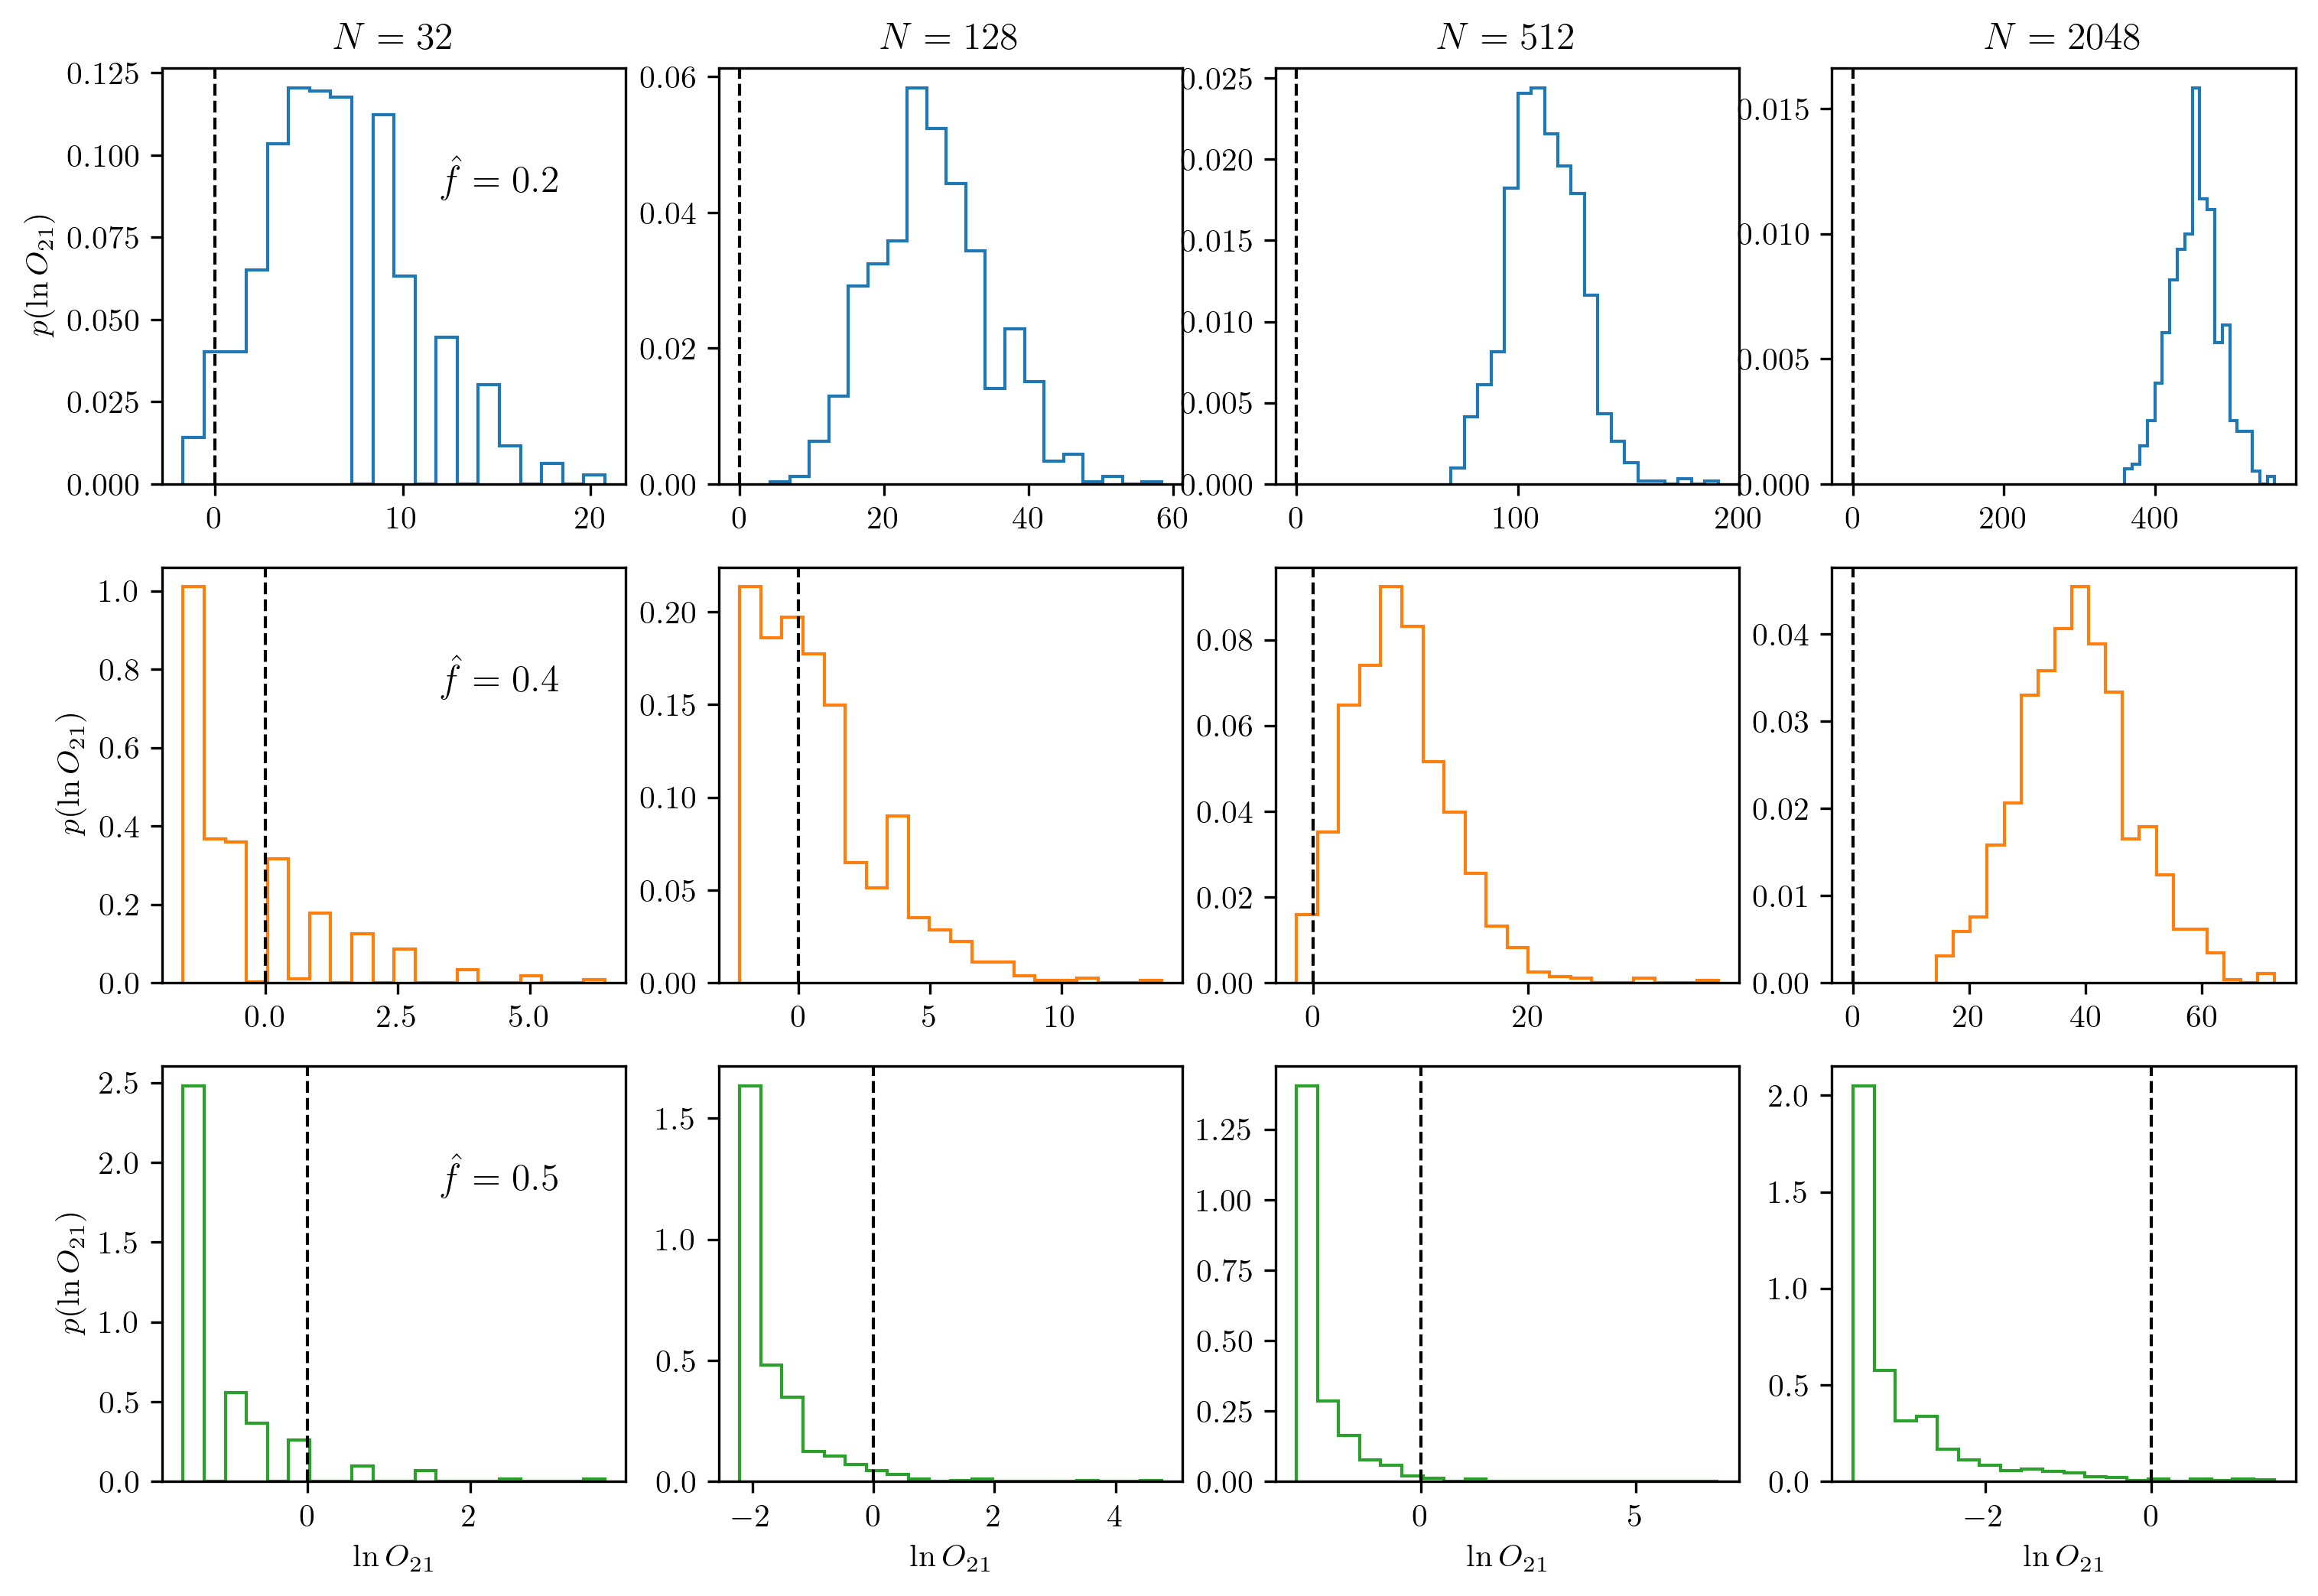

In [24]:
# Plot the distributions of log posterior odds
plt.figure(figsize=(12, 8))
ax = [[
        plt.subplot2grid((len(fhats), len(num_tosses)), (i, j)) for j in range(len(num_tosses))
    ] for i in range(len(fhats))]
fhat_colors = ['tab:blue', 'tab:orange', 'tab:green']

for i, fhat in enumerate(fhats):
    for j, n in enumerate(num_tosses):
        ax[i][j].hist(
            log_odds_results[:, j, i],
            histtype='step', bins=20, density=True, color=fhat_colors[i]
        )
        ax[i][j].axvline(0, color='k', linestyle='--', linewidth=1)

for i, fhat in enumerate(fhats):
    ax[i][0].set_ylabel(r'$p(\ln O_{21})$')
    ax[i][0].annotate(
        f'$\\hat{{f}} = {fhat:g}$', xy=(0.6, 0.7), xycoords='axes fraction', fontsize=12
    )

for j, n in enumerate(num_tosses):
    ax[0][j].set_title(f'$N = {n}$')
    ax[-1][j].set_xlabel(r'$\ln O_{21}$')

#### Question 1.2: Decisions based on posterior odds

We now use the Kass & Raftery (1995) criteria to make decisions based on the posterior odds:
- Barely worth mentioning: $|\ln O_{21}| < 1$
- Substantial: $1 \leq |\ln O_{21}| < 3$
- Strong: $3 \leq |\ln O_{21}| < 5$
- Decisive: $|\ln O_{21}| \geq 5$

**Tasks:**
1. For each $N$ and $\hat{f}$, compute the fraction of runs in each category.
2. For each $\hat{f}$, plot the fractions of different categories as a function of $N$.

data:
 fhat = 0.2
  N = 32, barely worth mentioning: 4.5%, substantial: 13.4%, strong: 25.1%, decisive: 57.0%
 fhat = 0.2
  N = 128, barely worth mentioning: 0.0%, substantial: 0.0%, strong: 0.1%, decisive: 99.9%
 fhat = 0.2
  N = 512, barely worth mentioning: 0.0%, substantial: 0.0%, strong: 0.0%, decisive: 100.0%
 fhat = 0.2
  N = 2048, barely worth mentioning: 0.0%, substantial: 0.0%, strong: 0.0%, decisive: 100.0%
 fhat = 0.4
  N = 32, barely worth mentioning: 47.9%, substantial: 49.8%, strong: 1.3%, decisive: 1.0%
 fhat = 0.4
  N = 128, barely worth mentioning: 39.7%, substantial: 43.6%, strong: 10.0%, decisive: 6.7%
 fhat = 0.4
  N = 512, barely worth mentioning: 4.0%, substantial: 8.9%, strong: 15.0%, decisive: 72.1%
 fhat = 0.4
  N = 2048, barely worth mentioning: 0.0%, substantial: 0.0%, strong: 0.0%, decisive: 100.0%
 fhat = 0.5
  N = 32, barely worth mentioning: 33.1%, substantial: 66.5%, strong: 0.4%, decisive: 0.0%
 fhat = 0.5
  N = 128, barely worth mentioning: 13.5%, sub

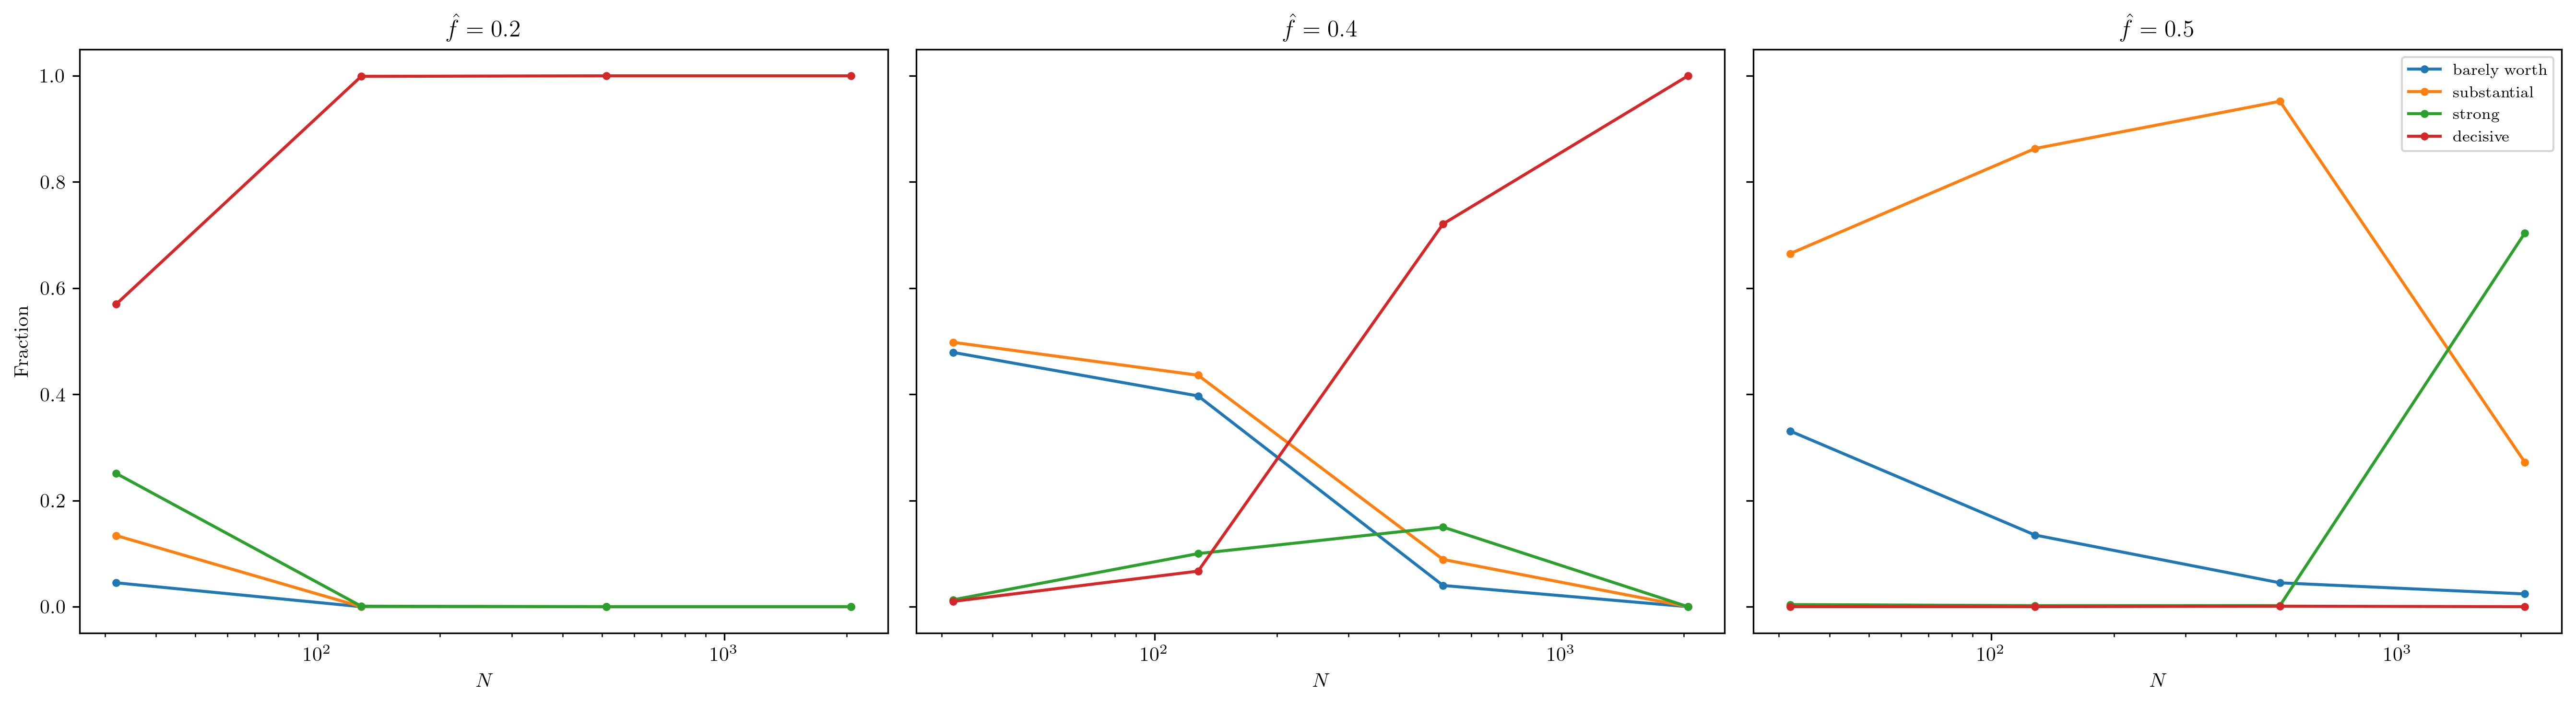

In [25]:
# NOTE: EDIT BELOW to complete the question
barely_worth_mentionings = []
substantials = []
strongs = []
decisives = []
    
for i, fhat in enumerate(fhats):
    barely_worth_mentioning_fhats = []
    substantial_fhats = []
    strong_fhats = []
    decisive_fhats = []
    for j, n in enumerate(num_tosses):
        arr = np.abs(log_odds_results[:, j, i])
        barely_worth_mentioning = np.count_nonzero(arr < 1)
        substantial = np.count_nonzero(np.logical_and(arr >= 1, arr < 3))
        strong = np.count_nonzero(np.logical_and(arr >= 3, arr < 5))
        decisive = np.count_nonzero(arr >= 5)
        barely_worth_mentioning_fhats.append(barely_worth_mentioning / 1000)
        substantial_fhats.append(substantial / 1000)
        strong_fhats.append(strong / 1000)
        decisive_fhats.append(decisive / 1000)
    barely_worth_mentionings.append(barely_worth_mentioning_fhats)
    substantials.append(substantial_fhats)
    strongs.append(strong_fhats)
    decisives.append(decisive_fhats)
    
print("data:")
for i, fhat in enumerate(fhats):
    for j, n in enumerate(num_tosses):
        print(f" fhat = {fhat}")
        print(f"  N = {n}, barely worth mentioning: {barely_worth_mentionings[i][j]:.1%}, substantial: {substantials[i][j]:.1%}, strong: {strongs[i][j]:.1%}, decisive: {decisives[i][j]:.1%}")

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
line_labels = ['barely worth mentioning', 'substantial', 'strong', 'decisive']
line_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for i, fhat in enumerate(fhats):
    ax = axs[i]
    ax.plot(
        num_tosses, barely_worth_mentionings[i],
        ".-", label='barely worth', color=line_colors[0]
    )
    ax.plot(
        num_tosses, substantials[i],
        ".-", label='substantial', color=line_colors[1]
    )
    ax.plot(
        num_tosses, strongs[i],
        ".-", label='strong', color=line_colors[2]
    )
    ax.plot(
        num_tosses, decisives[i],
        ".-", label='decisive', color=line_colors[3]
    )
    ax.set_xscale('log')
    ax.set_xlabel(r'$N$')
    if i == 0:
        ax.set_ylabel('Fraction')
    ax.set_title(f'$\\hat{{f}} = {fhat:g}$')
    if i == len(fhats) - 1:
        ax.legend(fontsize=8)

plt.tight_layout()

#### Question 1.3: Large sample limit

**Tasks:**
1. For each $\hat{f}$, plot the mean and standard deviation of $\ln O_{21}$ as a function of $N$.
2. For $\hat{f} = 0.5$, recompute the posterior log-odds with $N=2^k, k=1,2,\dots,11$, plot the mean of $\ln O_{21}$ as a function of $N$. Overplot the analytical expectation in the large sample limit.
3. Discuss your results for all questions in this exercise.

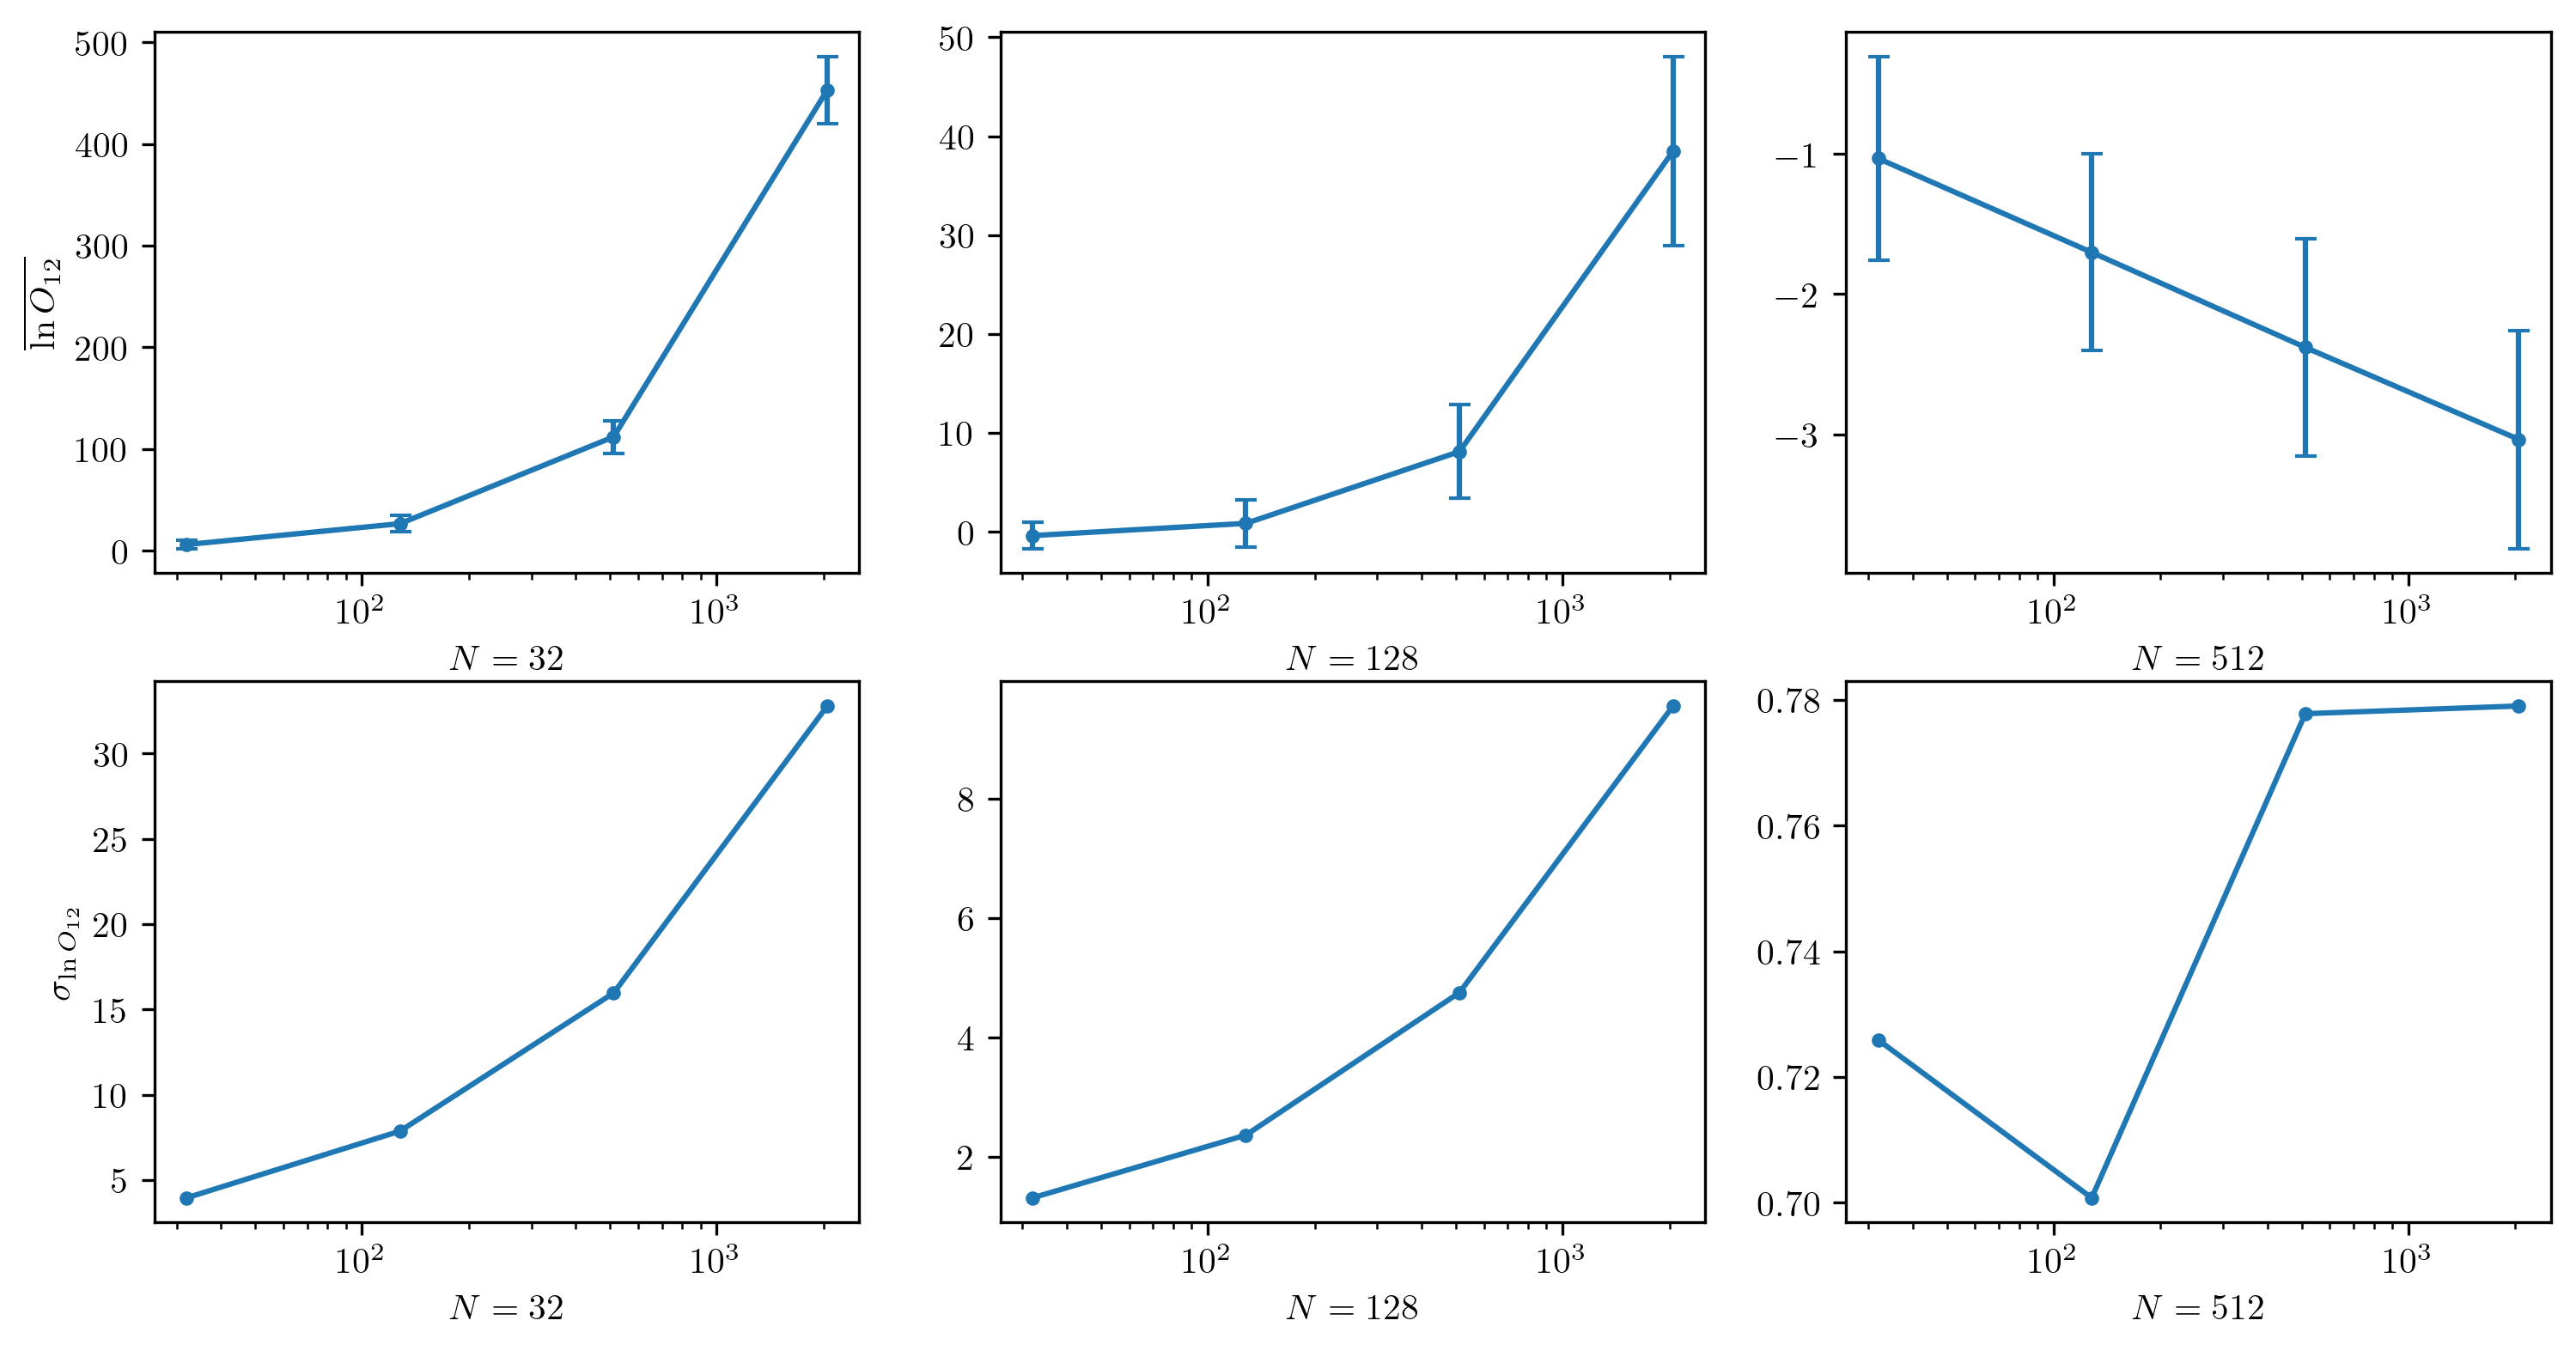

In [26]:
# Plot the summary statistics
plt.figure(figsize=(12, 6))
ax = [[
        plt.subplot2grid((2, len(fhats)), (i, j)) for i in range(2)
    ] for j in range(len(fhats))]

for i, fhat in enumerate(fhats):
    means = np.mean(log_odds_results[:, :, i], axis=0)
    stds = np.std(log_odds_results[:, :, i], axis=0)
    # NOTE: EDIT BELOW to make the plots; choose appropriate axes scales
    ax[i][0].errorbar(
        num_tosses, means, yerr=stds, fmt=".-", capsize=3
    )
    ax[i][1].plot(
        num_tosses, stds, ".-"
    )
    ax[i][0].set_xlabel(f'$N = {num_tosses[i]}$')
    ax[i][1].set_xlabel(f'$N = {num_tosses[i]}$')
    ax[i][0].set_xscale('log')
    ax[i][1].set_xscale('log')
    if i == 0:
        ax[i][0].set_ylabel(r"$\overline{\ln O_{12}}$")
        ax[i][1].set_ylabel(r"$\sigma_{\ln O_{12}}$")

In [27]:
num_tosses2 = [2**k for k in range(1, 12)]
mean_log_odds_f05 = []

for n in num_tosses2:
    log_odds_f05 = []
    for sim_data in data_coin:
        toss_sample = sim_data[:n]
        # NOTE: EDIT BELOW to compute the log posterior odds for fhat=0.5
        log_odds = posterior_odds_coin(toss_sample, 0.5)
        log_odds_f05.append(log_odds)
    mean_log_odds_f05.append(np.mean(log_odds_f05))

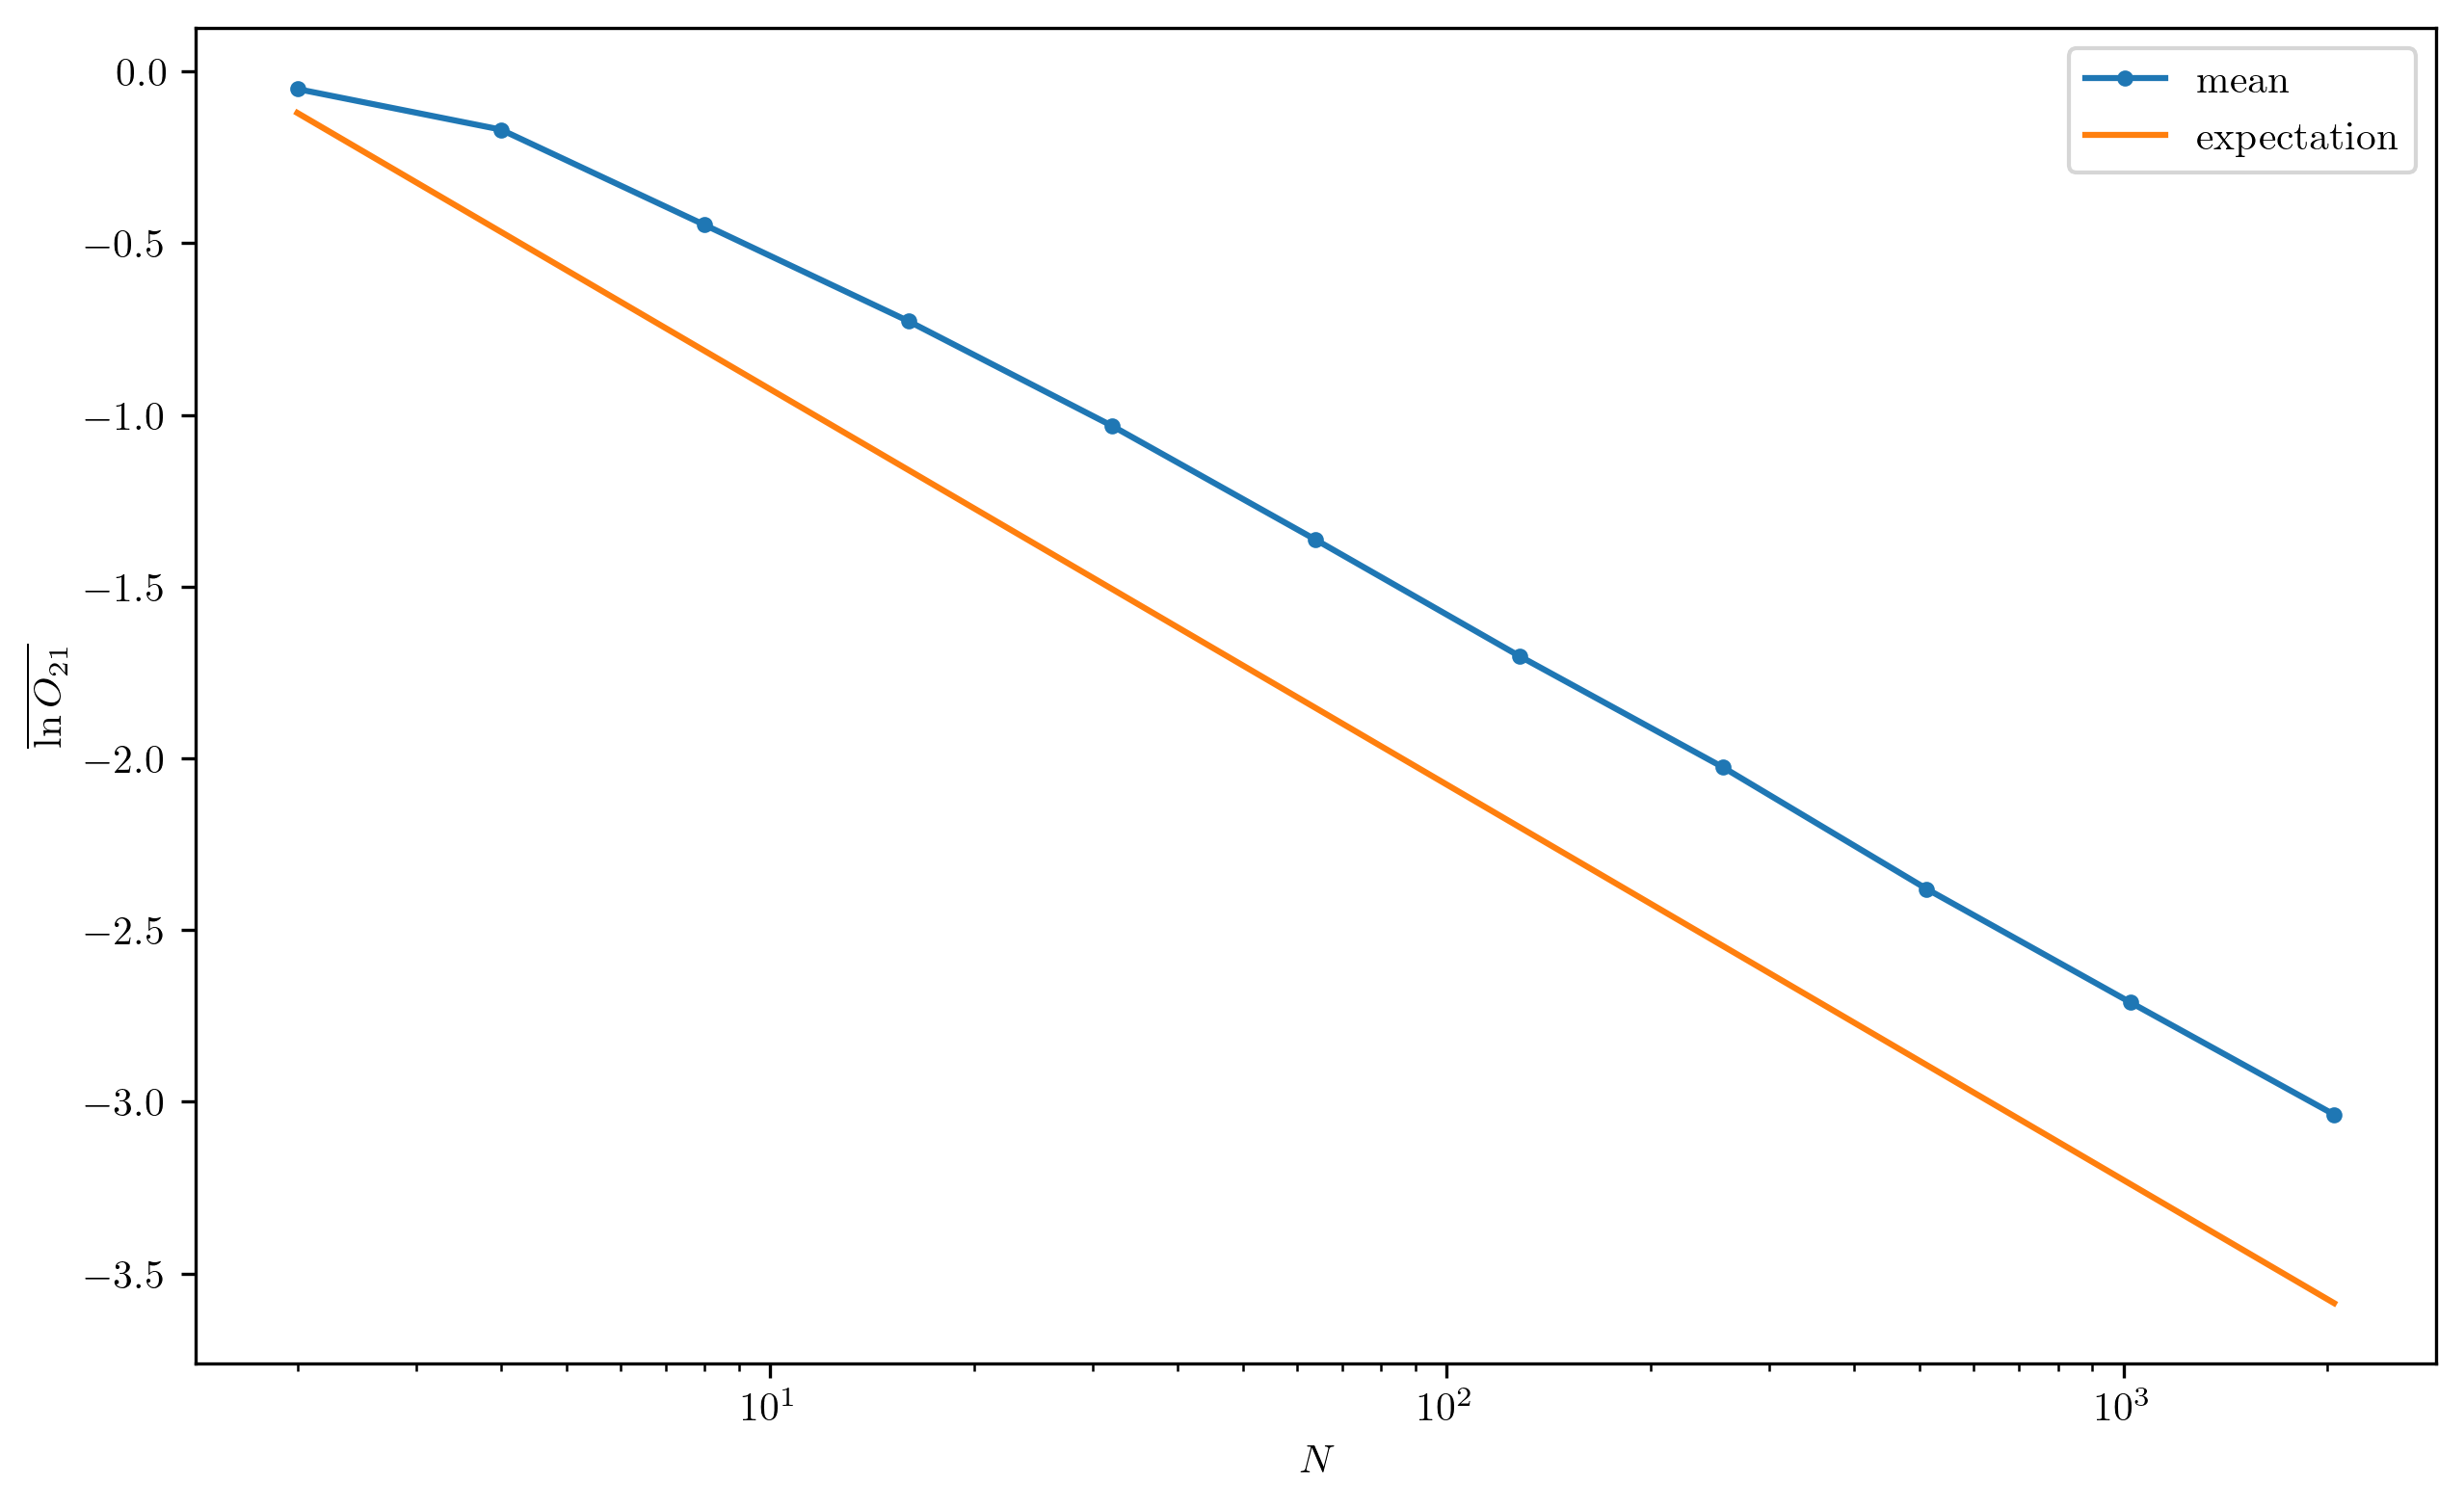

In [28]:
# NOTE: EDIT BELOW to plot the mean posterior log-odds as a function of N and overplot the analytical expectation 
plt.plot(
    num_tosses2,
    mean_log_odds_f05,
    ".-",
    label="mean"
)
num_tosses2_arr = np.array(num_tosses2)
plt.plot(
    num_tosses2_arr,
    -0.5 * np.log(num_tosses2_arr) + 0.5 * np.log(np.pi / 2),
    "-",
    label="expectation"
)
plt.xscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$\overline{\ln O_{21}}$')
plt.legend()
plt.show()

##### Discussions

可以发现在数据量变大的时候，后验比离 $1$ 更远，这表现出我们对其中一个模型的信任程度增加；而且更加简单的模型 (比如概率均匀分布) 比固定概率的模型要更加可信.

### Exercise 2: Signal identification: Gaussian vs. Lorentzian

A series of signals $\{x_i\}_{i=1}^N$ come from a distribution centered at 0. We want to decide whether the signals are from a Gaussian distribution or a Lorentzian distribution.
- **Model $M_G$ (Gaussian):** The signals are from a Gaussian distribution with mean 0 and standard deviation $\sigma$ (unknown):
    $$p(x|\sigma, M_G) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right],$$
- **Model $M_L$ (Lorentzian):** The signals are from a Lorentzian distribution with location 0 and scale $\gamma$ (unknown):
    $$p(x|\gamma, M_L) = \frac{1}{\pi} \left[ \frac{\gamma}{(x-\mu)^2+\gamma^2} \right]$$

Assume a model prior of $P(M_G|I) = P(M_L|I)$.

#### Question 2.1: Signal sampling

**Tasks:**
1. Sample two datasets of size 150 from each distribution:
    - Dataset 1: Gaussian with $\mu_{\rm true} = 0$ and $\sigma_{\rm true} = 1$.
    - Dataset 2: Lorentzian with $\mu_{\rm true} = 0$ and $\gamma_{\rm true} = 1$.
2. Plot the histograms overlaid with the true PDFs.
3. For each $N \in \{ 8, 16, 32, 64, 128 \}$, compute the sample mean, standard deviation, and median for each dataset. Plot the results as a function of $N$.

In [29]:
def sim_signal(num, dist='gaussian', mu=0, sigma=1, gamma=1, seed=42):
    """Simulate the series of signals
    Args:
        num: int, number of signals to simulate
        dist: str, type of distribution ('gaussian' or 'lorentzian')
        mu: float, mean of the distribution
        sigma: float, standard deviation for Gaussian
        gamma: float, scale parameter for Lorentzian
        seed: int, random seed
    Return: array of float, simulated signals
    """
    rng = np.random.default_rng(seed)
    # NOTE: EDIT BELOW to simulate signals based on the specified distribution
    if dist == 'gaussian':
        signals = rng.normal(mu, sigma, num)
    elif dist == 'lorentzian':
        signals = rng.standard_cauchy(num) * gamma + mu
    else:
        raise ValueError("Unsupported distribution type.")
    return signals

In [30]:
# Simulate the signals
mu_true = 0.0
sigma_true = 1.0
gamma_true = 1.0
nsample = 150

data_g = sim_signal(nsample, dist='gaussian', mu=mu_true, sigma=sigma_true, seed=seed)
data_l = sim_signal(nsample, dist='lorentzian', mu=mu_true, gamma=gamma_true, seed=seed)

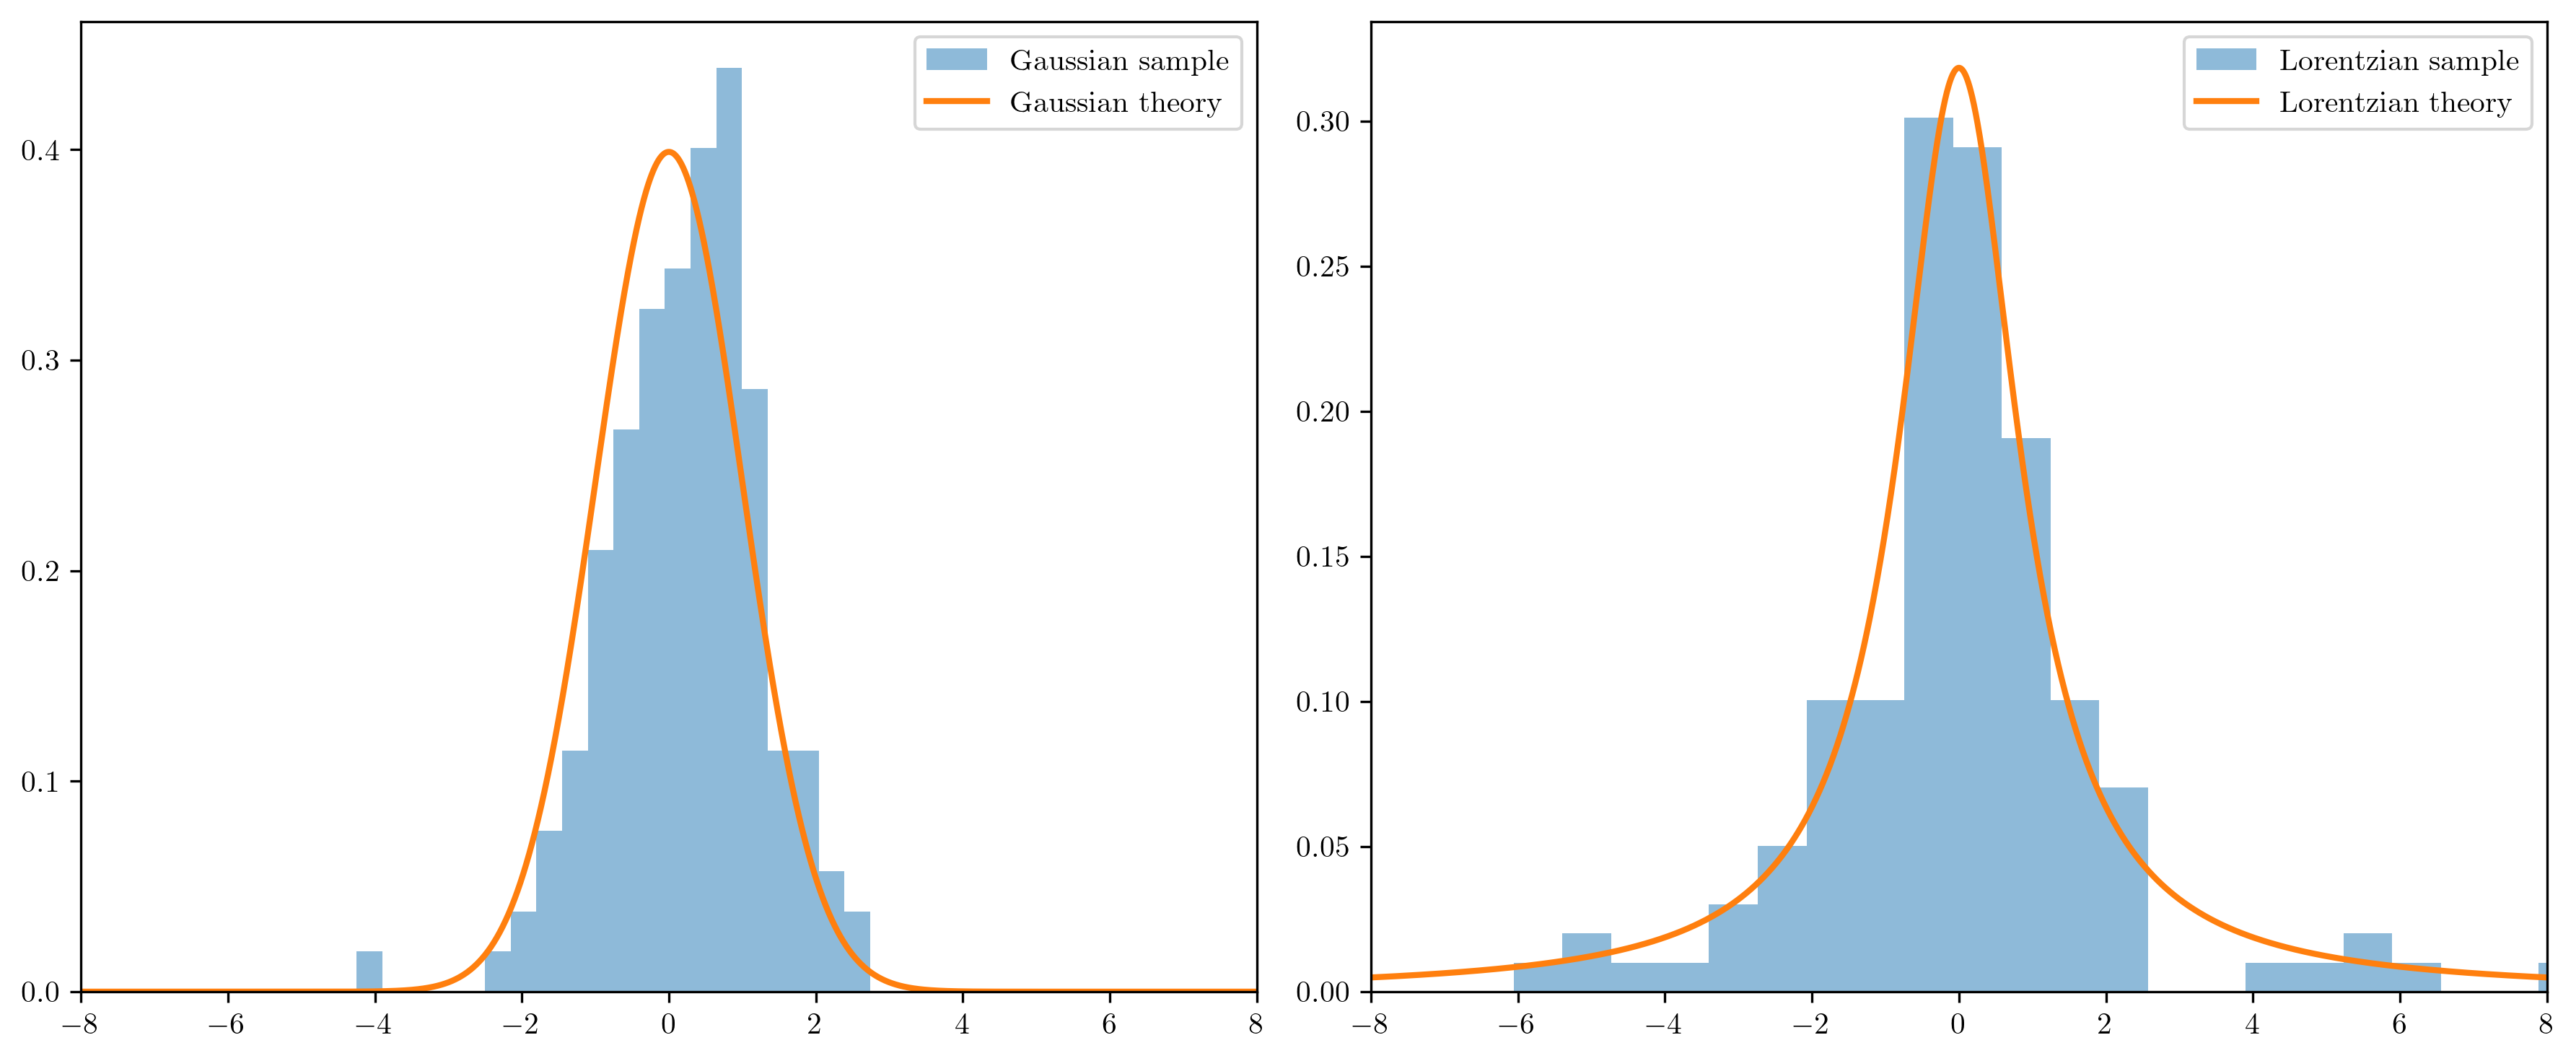

In [31]:
# NOTE: EDIT BELOW to plot the histograms of the simulated signals
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
x = np.linspace(-8, 8, 2000)

data_g_theory = 1 / np.sqrt(2 * np.pi * sigma_true**2) * np.exp(-(x - mu_true)**2 / (2 * sigma_true**2))
data_l_theory = (1 / np.pi) * (gamma_true / ((x - mu_true)**2 + gamma_true**2))

axs[0].hist(
    data_g, bins=20, density=True,
    alpha=0.5, color='tab:blue', label='Gaussian sample'
)
axs[0].plot(
    x, data_g_theory,
    '-', color='tab:orange', lw=2, label='Gaussian theory'
)
axs[0].set_xlim(x.min(), x.max())
axs[0].legend()

axs[1].hist(
    data_l, bins=800, density=True,
    alpha=0.5, color='tab:blue', label='Lorentzian sample'
)
axs[1].plot(
    x, data_l_theory,
    '-', color='tab:orange', lw=2, label='Lorentzian theory'
)
axs[1].set_xlim(x.min(), x.max())
axs[1].legend()

plt.tight_layout()

说明：这里画出了理论的分布曲线，因为 Lorentz 分布不归一，然后生成的时候出现了在 $500$ 这种非常大位置的点，这导致 ``bins`` 取值必须要很大，来满足数据分布太宽、图片难以放下的需求；同时为了表现这个 sampling 是满足这两个理论分布的，把理论曲线也画出来了.

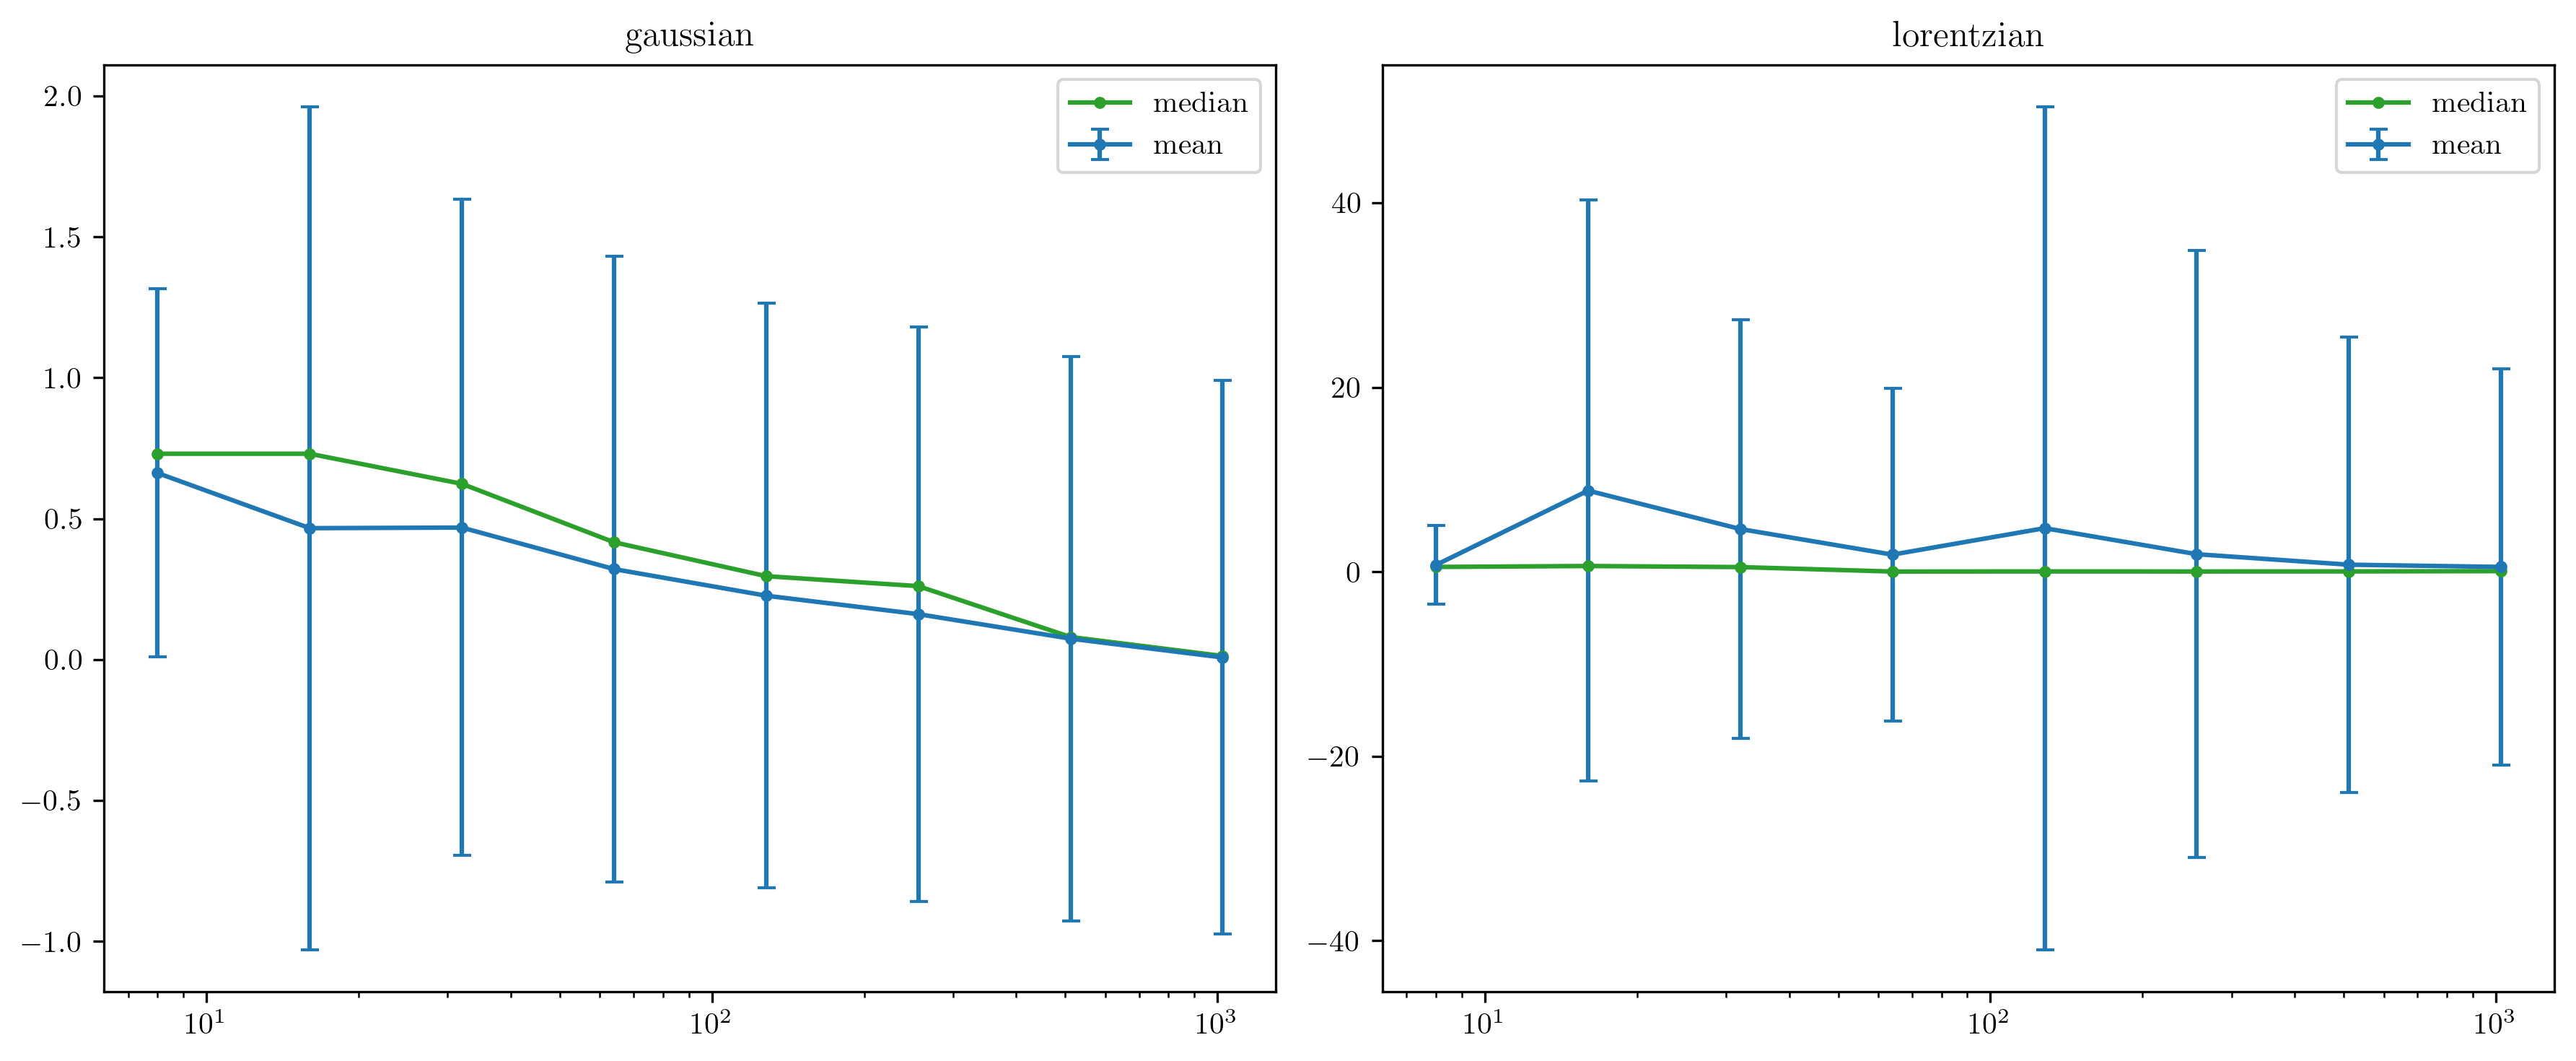

In [32]:
num_signals = [8, 16, 32, 64, 128, 256, 512, 1024]  # Different numbers of signals to consider

# NOTE: EDIT BELOW to compute the sample statistics and plot the results as function of number of signals
mean_data_g = []
mean_data_l = []
std_data_g = []
std_data_l = []
median_data_g = []
median_data_l = []

for n in num_signals:
    data_g_n = sim_signal(n, dist='gaussian', mu=mu_true, sigma=sigma_true, seed=seed)
    data_l_n = sim_signal(n, dist='lorentzian', mu=mu_true, gamma=gamma_true, seed=seed)
    mean_data_g.append(np.mean(data_g_n))
    std_data_g.append(np.std(data_g_n))
    median_data_g.append(np.median(data_g_n))
    mean_data_l.append(np.mean(data_l_n))
    std_data_l.append(np.std(data_l_n))
    median_data_l.append(np.median(data_l_n))
    
statistic_colors = ['tab:blue', 'tab:orange', 'tab:green']
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].errorbar(num_signals, mean_data_g, fmt='.-', yerr=std_data_g, capsize=3, color='tab:blue', label='mean')
axs[0].plot(num_signals, median_data_g, ".-", color='tab:green', label='median')
axs[0].set_xscale('log')
axs[0].legend()
axs[0].set_title('gaussian')
axs[1].errorbar(num_signals, mean_data_l, fmt='.-', yerr=std_data_l, capsize=3, color='tab:blue', label='mean')
axs[1].plot(num_signals, median_data_l, ".-", color='tab:green', label='median')
axs[1].set_xscale('log')
axs[1].set_title('lorentzian')
axs[1].legend()

plt.tight_layout()

#### Question 2.2: Model comparison

We compare the two models $M_G$ and $M_L$ using Jeffreys priors for the scale parameters:
- For $M_G$:
    $$p(\sigma|M_G) = \frac{1}{\sigma \ln(\sigma_{\rm max}/\sigma_{\rm min})}$$
- For $M_L$:
    $$p(\gamma|M_L) = \frac{1}{\gamma \ln(\gamma_{\rm max}/\gamma_{\rm min})}$$

Assume a prior range of $\sigma_{\rm min} = \gamma_{\rm min} = 0.1$ and $\sigma_{\rm max} = \gamma_{\rm max} = 10$.

**Tasks:**
1. For each dataset and each $N \in \{ 8, 16, 32, 64, 128 \}$, compute the posterior log-odds $\ln O_{GL} \equiv \ln [p(M_G|DI) / p(M_L|DI)]$.
2. Plot the posterior log-odds as a function of $N$ for both datasets.

**Hint:** The Jeffreys' prior is uniform in log space. So you can omit it when working with log-likelihoods and log-evidences.

In [33]:
from scipy.special import logsumexp

def log_evidence_gaussian(data, sigma_min=0.1, sigma_max=10, mu_true=0):
    """Compute the log evidence for Gaussian model with unknown sigma
    Args:
        data: array of float, observed signals
        sigma_min: float, minimum sigma for prior
        sigma_max: float, maximum sigma for prior
        mu_true: float, true mean of the distribution
    Return: float, log evidence
    """
    nsigma = 1000
    smin, smax = np.log(sigma_min), np.log(sigma_max)
    sigma = np.logspace(smin, smax, nsigma, base=np.e)

    loglike = [-np.log(np.sqrt(2*np.pi)*sigma) - (d-mu_true)**2/(2*sigma**2) for d in data]
    loglike_sum = np.sum(loglike, axis=0)
    log_evidence = logsumexp(loglike_sum) - np.log(nsigma) # Integration over log(sigma)
    return log_evidence

def log_evidence_lorentzian(data, gamma_min=0.1, gamma_max=10, mu_true=0):
    """Compute the log evidence for Lorentzian model with unknown gamma
    Args:
        data: array of float, observed signals
        gamma_min: float, minimum gamma for prior
        gamma_max: float, maximum gamma for prior
        mu_true: float, true mean of the distribution
    Return: float, log evidence
    """
    ngamma = 1000
    gmin, gmax = np.log(gamma_min), np.log(gamma_max)
    gamma = np.logspace(gmin, gmax, ngamma, base=np.e)

    loglike = [-np.log(np.pi * gamma * (1 + ((d - mu_true)/gamma)**2)) for d in data]
    loglike_sum = np.sum(loglike, axis=0)
    log_evidence = logsumexp(loglike_sum) - np.log(ngamma) # Integration over log(gamma)
    return log_evidence

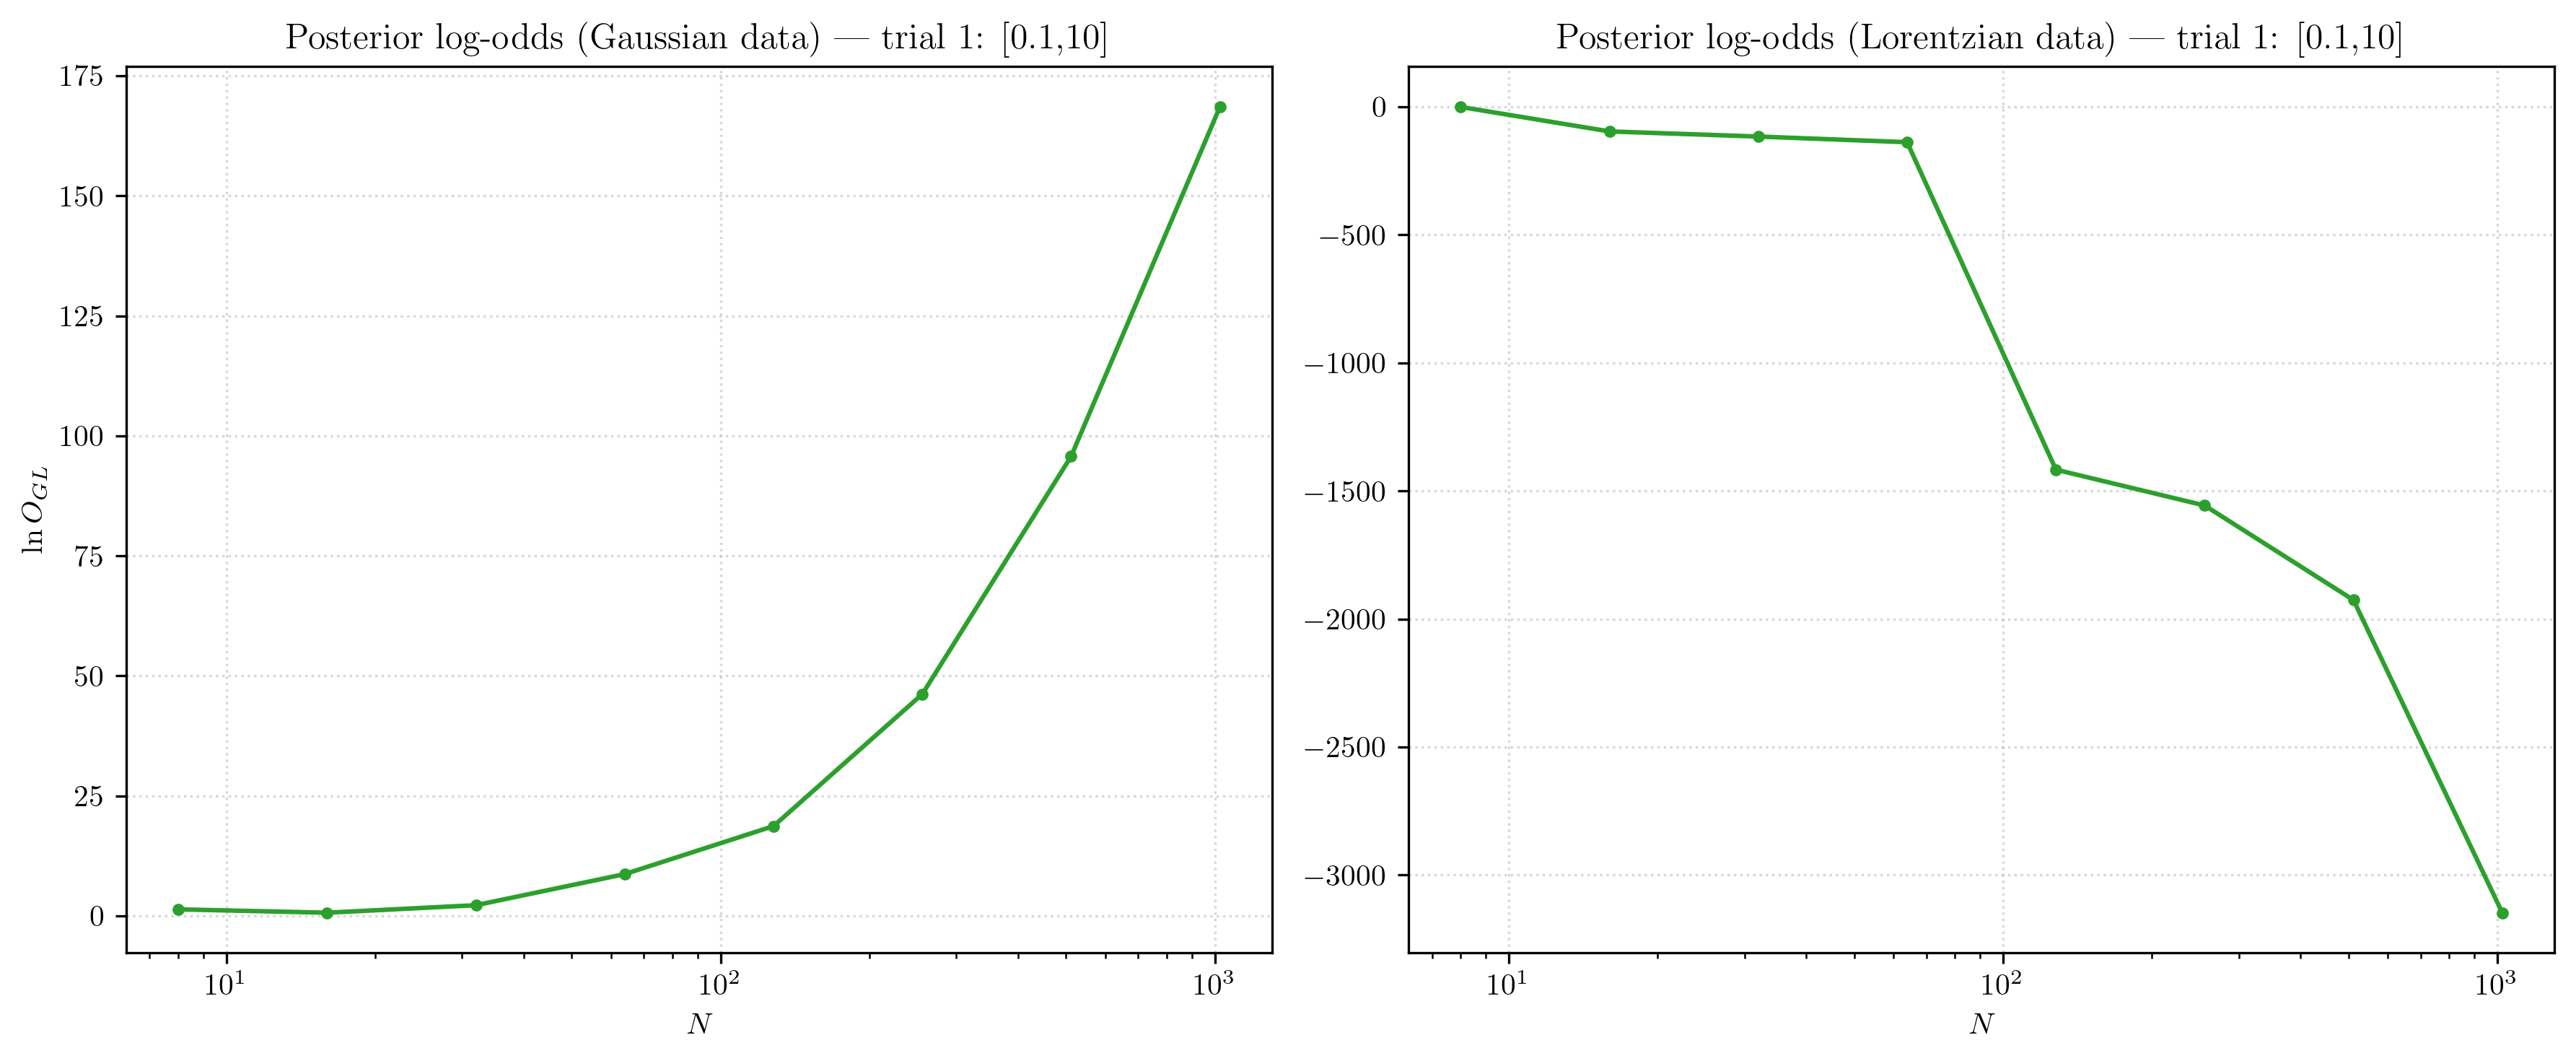

In [34]:
# NOTE: EDIT BELOW to compute and plot the posterior log-odds
# we know that posterior odd ratio equals to evidence ratio
posterior_odds_signal_g = []
posterior_odds_signal_l = []

for n in num_signals:
    # Gaussian data (trial 1)
    data_g_n = sim_signal(n, dist='gaussian', mu=mu_true, sigma=sigma_true, seed=seed)
    log_evidence_g = log_evidence_gaussian(data_g_n, sigma_min=0.1, sigma_max=10, mu_true=0)
    log_evidence_l = log_evidence_lorentzian(data_g_n, gamma_min=0.1, gamma_max=10, mu_true=0)
    posterior_odds_signal_g.append(log_evidence_g - log_evidence_l)

    # Lorentzian data (trial 1)
    data_l_n = sim_signal(n, dist='lorentzian', mu=mu_true, gamma=gamma_true, seed=seed)
    log_evidence_g_l = log_evidence_gaussian(data_l_n, sigma_min=0.1, sigma_max=10, mu_true=0)
    log_evidence_l_l = log_evidence_lorentzian(data_l_n, gamma_min=0.1, gamma_max=10, mu_true=0)
    posterior_odds_signal_l.append(log_evidence_g_l - log_evidence_l_l)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Gaussian (left)
axs[0].plot(num_signals, posterior_odds_signal_g, ".-", color='tab:green')
axs[0].set_xscale('log')
axs[0].set_xlabel(r'$N$')
axs[0].set_title('Posterior log-odds (Gaussian data) — trial 1: [0.1,10]')
axs[0].grid(True, linestyle=':', alpha=0.5)

# Lorentzian (right)
axs[1].plot(num_signals, posterior_odds_signal_l, ".-", color='tab:green')
axs[1].set_xscale('log')
axs[1].set_xlabel(r'$N$')
axs[1].set_title('Posterior log-odds (Lorentzian data) — trial 1: [0.1,10]')
axs[1].grid(True, linestyle=':', alpha=0.5)

axs[0].set_ylabel(r'$\ln O_{GL}$')
plt.tight_layout()
plt.show()

#### Question 2.3: Prior sensitivity

**Tasks:**
1. Repeat Question 2.2 for prior ranges $[0.01, 100]$ and $[0.5, 2]$ for both $\sigma$ and $\gamma$.
2. For each dataset and each prior range, plot the posterior log-odds as a function of $N$.
3. Discuss your results for all questions in this exercise.

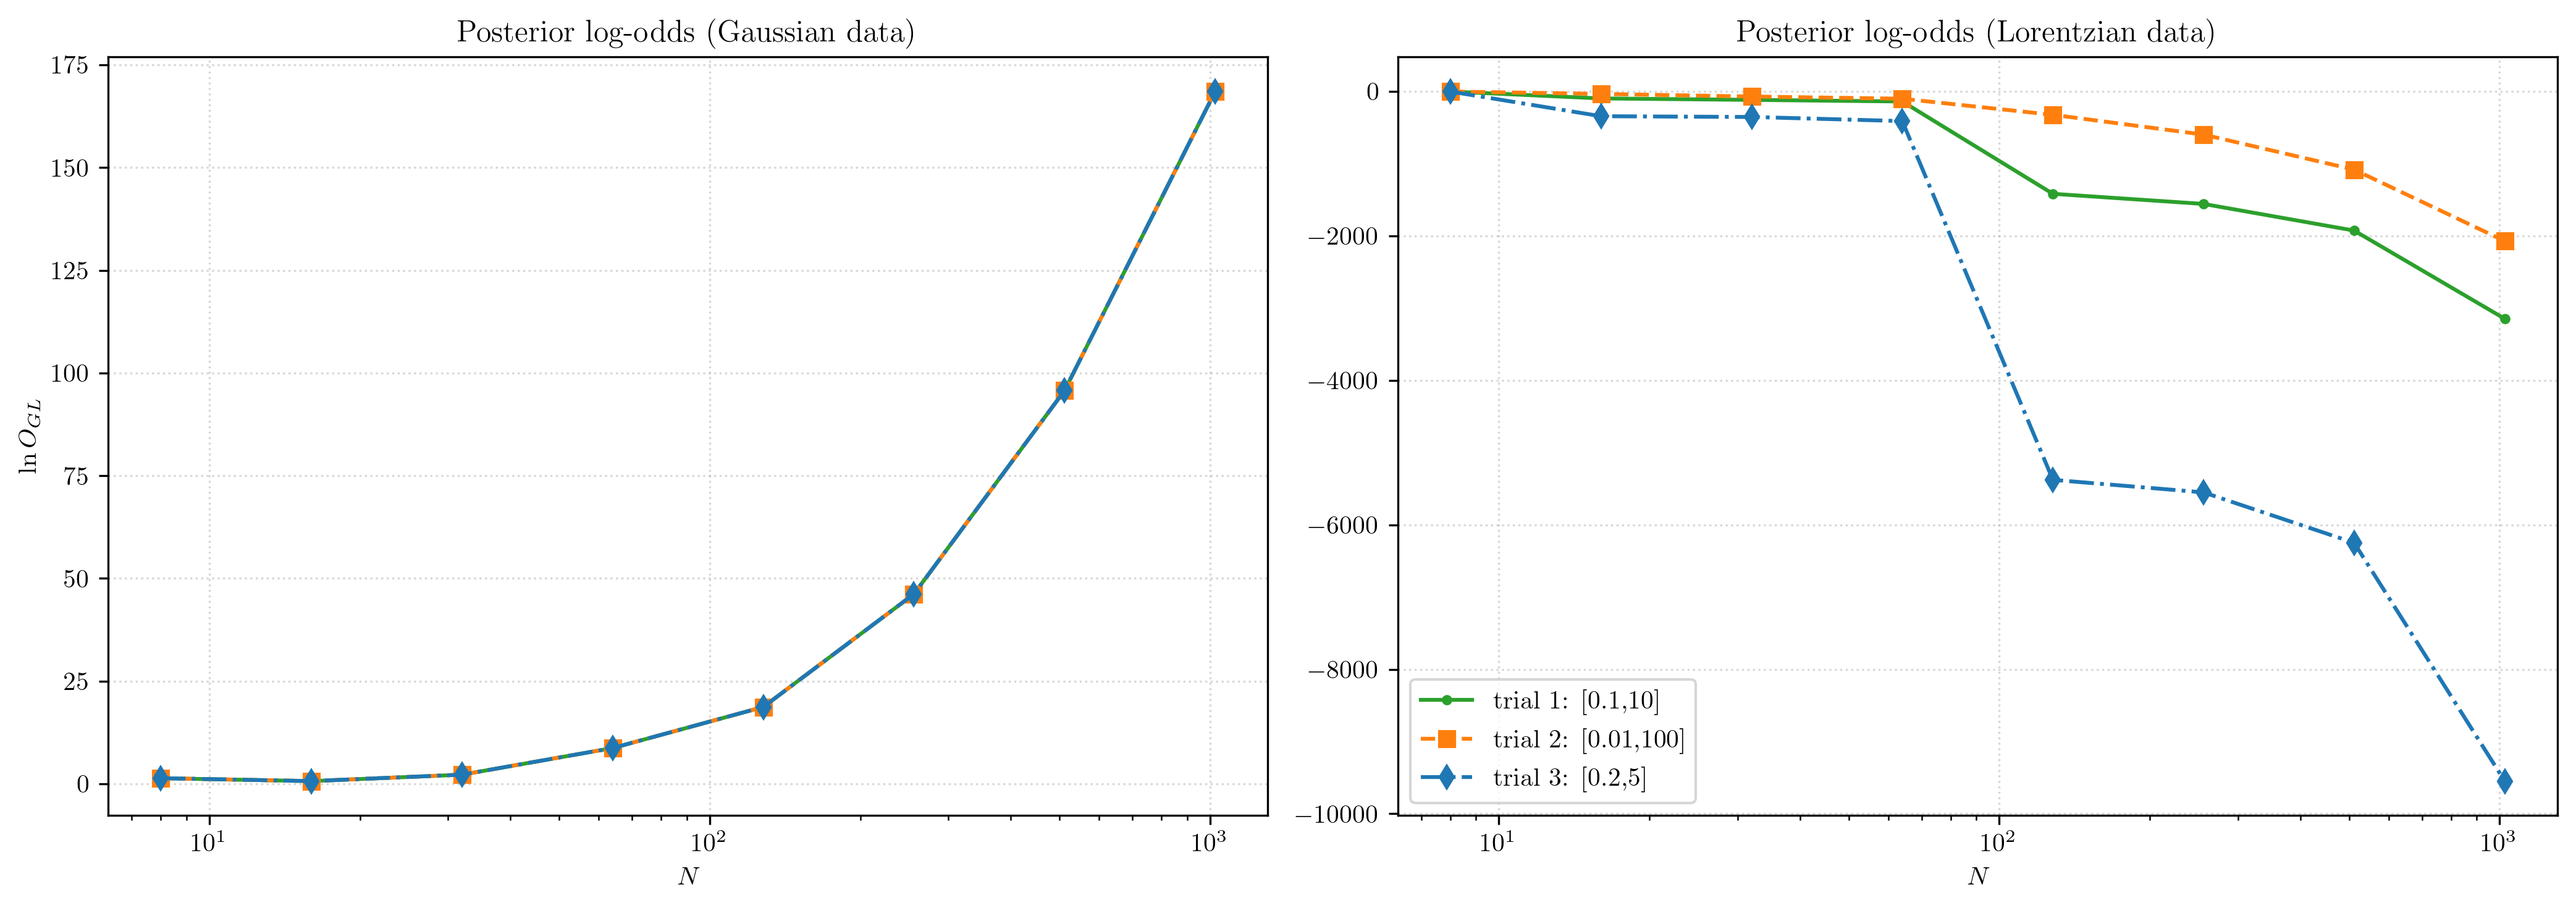

In [35]:
# NOTE: EDIT BELOW to complete the question
posterior_odds_g_1 = []
posterior_odds_g_2 = []
posterior_odds_g_3 = []
posterior_odds_l_1 = []
posterior_odds_l_2 = []
posterior_odds_l_3 = []

for n in num_signals:
    # Gaussian dataset
    data_g_n = sim_signal(n, dist='gaussian', mu=mu_true, sigma=sigma_true, seed=seed)
    lg_g_1 = log_evidence_gaussian(data_g_n, sigma_min=0.1, sigma_max=10, mu_true=0)
    lg_l_1 = log_evidence_lorentzian(data_g_n, gamma_min=0.1, gamma_max=10, mu_true=0)
    posterior_odds_g_1.append(lg_g_1 - lg_l_1)

    lg_g_2 = log_evidence_gaussian(data_g_n, sigma_min=0.01, sigma_max=100, mu_true=0)
    lg_l_2 = log_evidence_lorentzian(data_g_n, gamma_min=0.01, gamma_max=100, mu_true=0)
    posterior_odds_g_2.append(lg_g_2 - lg_l_2)

    lg_g_3 = log_evidence_gaussian(data_g_n, sigma_min=0.2, sigma_max=5, mu_true=0)
    lg_l_3 = log_evidence_lorentzian(data_g_n, gamma_min=0.2, gamma_max=5, mu_true=0)
    posterior_odds_g_3.append(lg_g_3 - lg_l_3)

    # Lorentzian dataset
    data_l_n = sim_signal(n, dist='lorentzian', mu=mu_true, gamma=gamma_true, seed=seed)
    ll_g_1 = log_evidence_gaussian(data_l_n, sigma_min=0.1, sigma_max=10, mu_true=0)
    ll_l_1 = log_evidence_lorentzian(data_l_n, gamma_min=0.1, gamma_max=10, mu_true=0)
    posterior_odds_l_1.append(ll_g_1 - ll_l_1)

    ll_g_2 = log_evidence_gaussian(data_l_n, sigma_min=0.01, sigma_max=100, mu_true=0)
    ll_l_2 = log_evidence_lorentzian(data_l_n, gamma_min=0.01, gamma_max=100, mu_true=0)
    posterior_odds_l_2.append(ll_g_2 - ll_l_2)

    ll_g_3 = log_evidence_gaussian(data_l_n, sigma_min=0.2, sigma_max=5, mu_true=0)
    ll_l_3 = log_evidence_lorentzian(data_l_n, gamma_min=0.2, gamma_max=5, mu_true=0)
    posterior_odds_l_3.append(ll_g_3 - ll_l_3)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gaussian (left)
axs[0].plot(num_signals, posterior_odds_g_1, ".-", color='tab:green')
axs[0].plot(num_signals, posterior_odds_g_2, "s--", color='tab:orange')
axs[0].plot(num_signals, posterior_odds_g_3, "d-.", color='tab:blue')
axs[0].set_xscale('log')
axs[0].set_xlabel(r'$N$')
axs[0].set_title('Posterior log-odds (Gaussian data)')
axs[0].grid(True, linestyle=':', alpha=0.5)

# Lorentzian (right)
axs[1].plot(num_signals, posterior_odds_l_1, ".-", color='tab:green', label='trial 1: [0.1,10]')
axs[1].plot(num_signals, posterior_odds_l_2, "s--", color='tab:orange', label='trial 2: [0.01,100]')
axs[1].plot(num_signals, posterior_odds_l_3, "d-.", color='tab:blue', label='trial 3: [0.2,5]')
axs[1].set_xscale('log')
axs[1].set_xlabel(r'$N$')
axs[1].set_title('Posterior log-odds (Lorentzian data)')
axs[1].grid(True, linestyle=':', alpha=0.5)
axs[1].legend(fontsize=10)

axs[0].set_ylabel(r'$\ln O_{GL}$')
plt.tight_layout()
plt.show()

##### Discussions

从第一问可以看出来 Lorentz 分布是一个非常长尾的分布，在生成的时候峰值要比 Gauss 分布更窄，但是总体的宽度非常宽.

计算后验分布，我们算的是 $\ln E(\text{Gaussian})/E(\text{Lorentzian})$，可以明显看出在数据是由 Gaussian 分布生成时，后验比随着数据量的增加不断增大，表现出 Gauss 分布在描述这些数据上的优越性；在数据是由 Lorentz 分布生成时，后验比随着数据量的增加不断降低. 但是我并不太理解为什么 Lorentz 分布的后验比会有那么大的数量级，而且呈现出一个阶梯状的特征.

### Exercise 3: Spectral line identification

We observe integer-binned photon counts $n(\lambda)$ for $\lambda \in [-10,10]$ from a steady source. Consider three models of the *expected* counts $\mu(\lambda)$:
1. $M_F$ (Flat continuum):
    $$\mu(\lambda) = B$$
2. $M_G$ (Gaussian line + continuum):
    $$\mu(\lambda) = A \exp\left[-\frac{(\lambda - \lambda_0)^2}{2\sigma^2}\right] + B$$
3. $M_L$ (Lorentzian line + continuum):
    $$\mu(\lambda) = A \frac{\gamma^2}{(\lambda - \lambda_0)^2 + \gamma^2} + B$$

#### Question 3.1: Simulate the spectrum

Use $\lambda_0 = 0, \sigma = 1, \gamma = 1$. Consider the following 3 parameter sets (effectively different exposure times):
1. $A=10, B=50$
2. $A=100, B=500$
3. $A=1000, B=5000$

**Tasks:**
1. Simulate the spectrum $n(\lambda)$ for all the 3 models and 3 parameter sets.
2. Plot the simulated spectra together with the expected counts $\mu(\lambda)$.

**Hint:** What is the appropriate distribution for simulating the observed photon counts given the expected counts for a steady source?

In [36]:
# NOTE: EDIT BELOW to complete the question (feel free to add more cells as needed)
def sim_data(num, dist='f', A=10, B=50, mu=0, sigma=1, gamma=1, seed=42):
    """Simulate the series of spectral counts
    Args:
        num: int, number of wavelength bins (will be spaced in [-10, 10])
        dist: str, 'f' (flat), 'g' (gaussian), or 'l' (lorentzian)
        A: amplitude of the line
        B: continuum level (counts)
        mu: line center (lambda0)
        sigma: Gaussian sigma
        gamma: Lorentzian gamma
        seed: random seed
    Return:
        lam: 1d array of wavelength bin centers
        counts: integer array of simulated Poisson counts
        mu_expect: expected counts (lambda) array used for Poisson sampling
    """
    rng = np.random.default_rng(seed)
    lam = np.linspace(-10, 10, num)

    if dist == 'f':
        mu_expect = np.full_like(lam, fill_value=B, dtype=float)
    elif dist == 'g':
        mu_expect = A * np.exp(-0.5 * ((lam - mu) / sigma) ** 2) + B
    elif dist == 'l':
        mu_expect = A * (gamma ** 2 / ((lam - mu) ** 2 + gamma ** 2)) + B
    else:
        raise ValueError("Unsupported distribution type.")

    counts = rng.poisson(mu_expect)
    return lam, counts, mu_expect

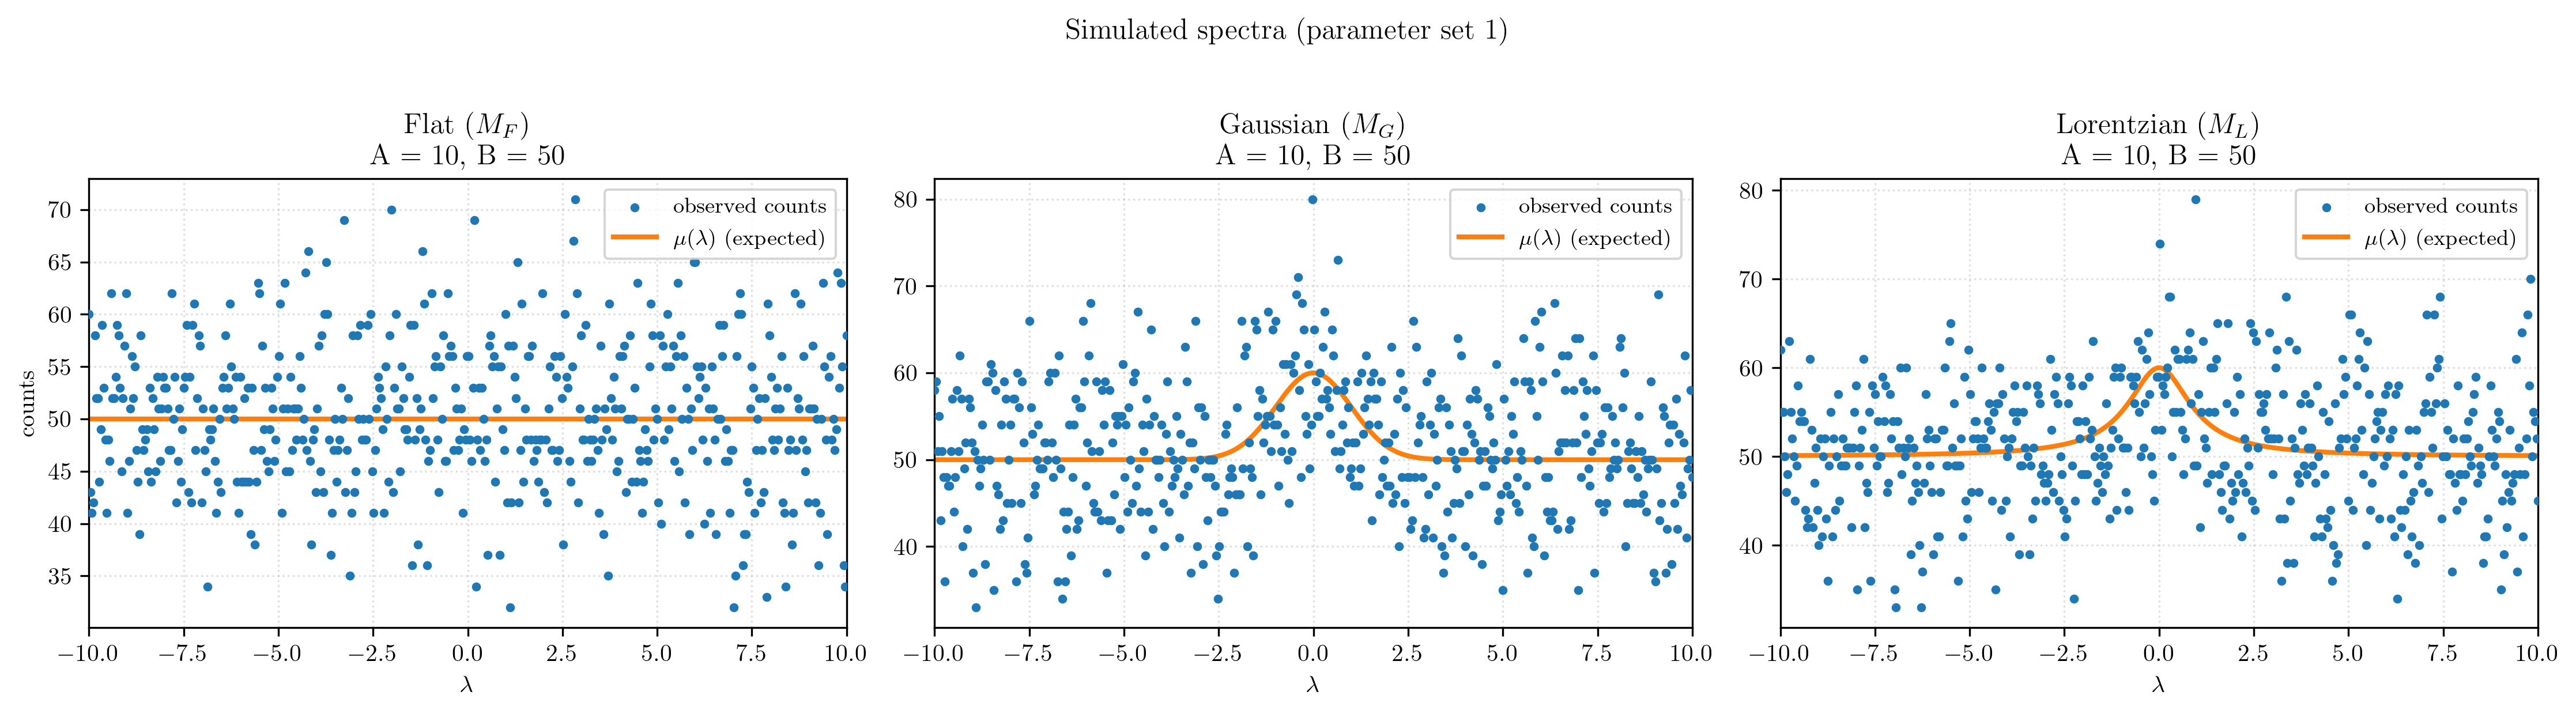

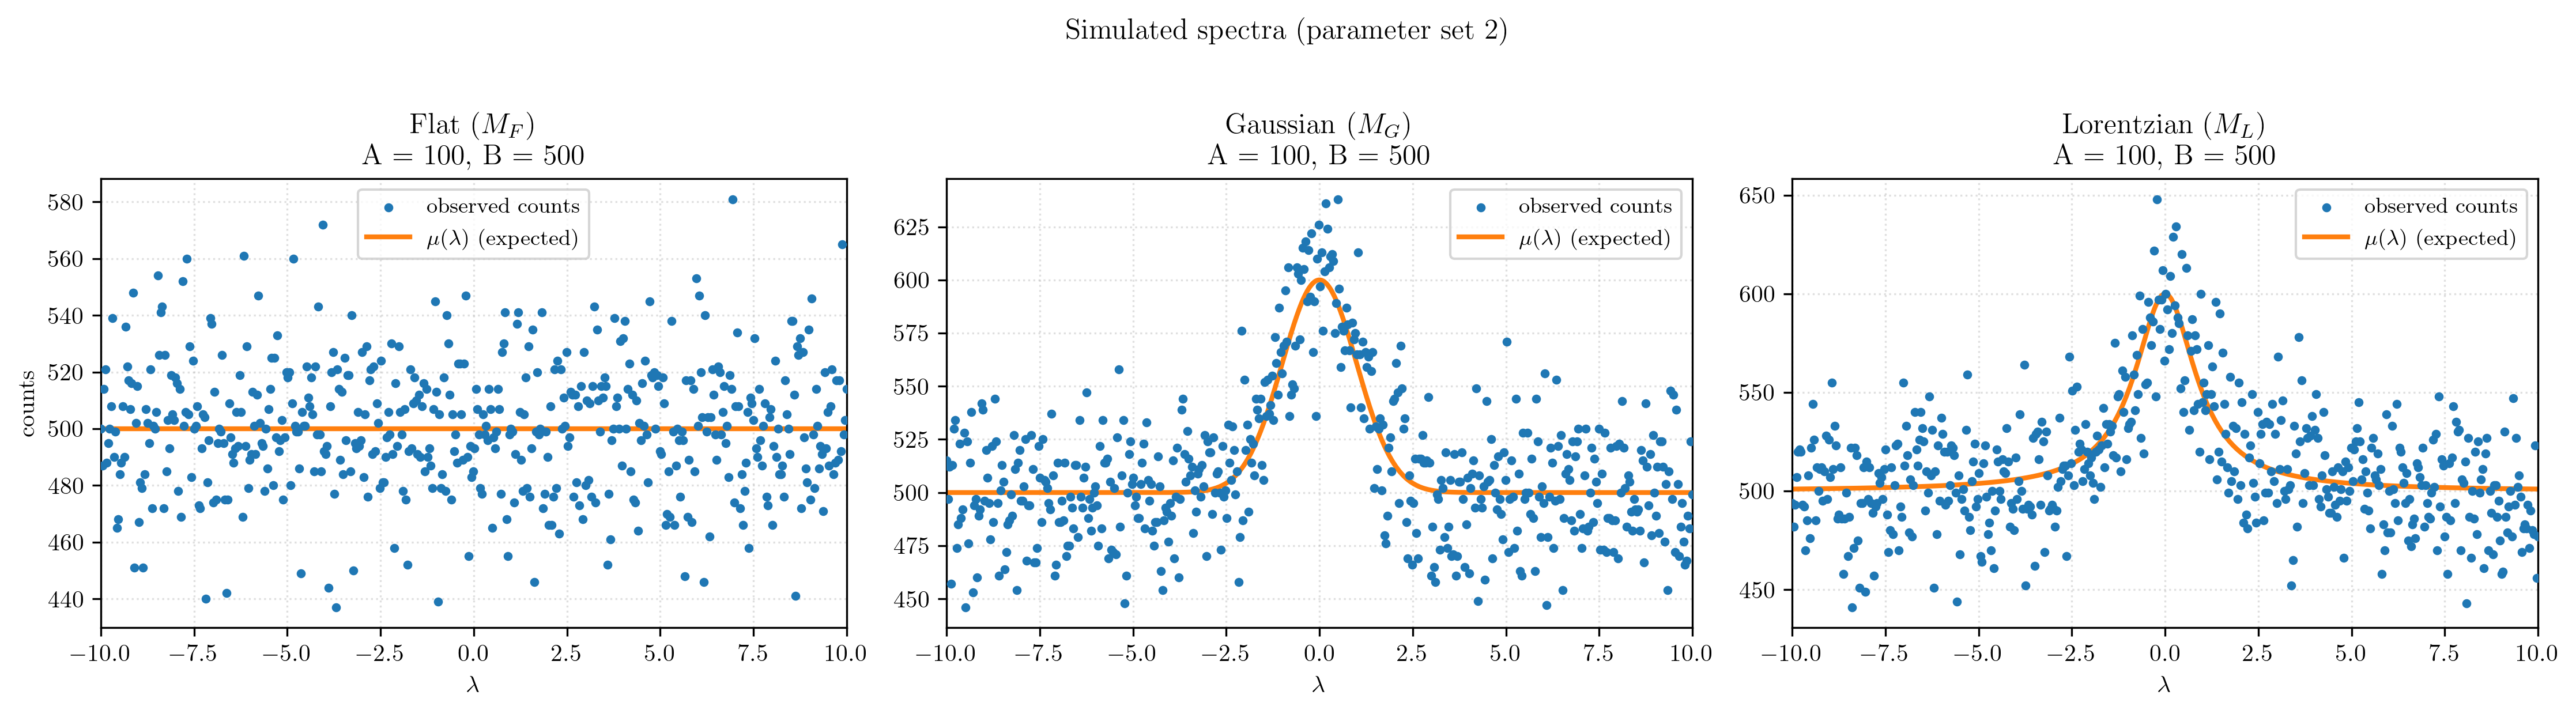

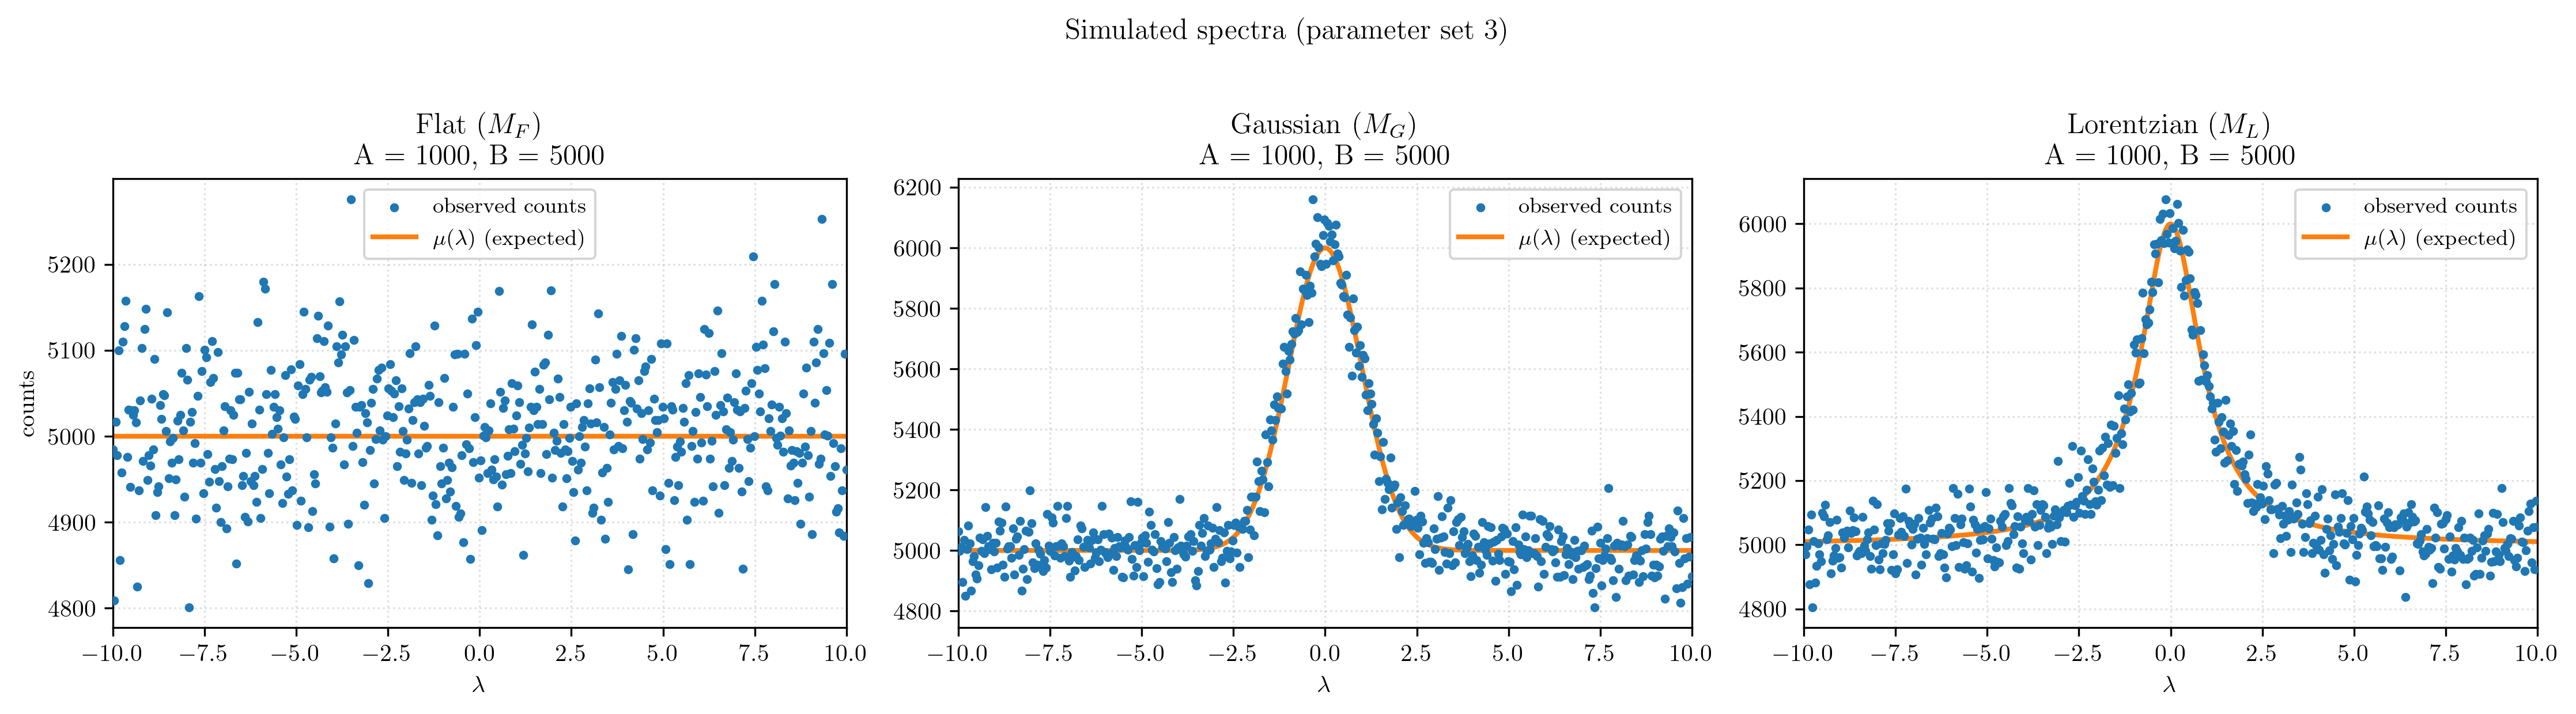

In [61]:
param_sets = [(10, 50), (100, 500), (1000, 5000)]
models = [('f', r'Flat $(M_F)$'), ('g', r'Gaussian $(M_G)$'), ('l', r'Lorentzian $(M_L)$')]

for i, (A, B) in enumerate(param_sets):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    for j, (dist, label) in enumerate(models):
        lam, counts, mu_expect = sim_data(
            512, dist=dist, A=A, B=B, mu=0, 
            sigma=1, gamma=1, seed=seed + i * 10 + j
        )
        axs[j].scatter(
            lam, counts, color='tab:blue', marker='.',
            s=30, label='observed counts', zorder=3
        )
        axs[j].plot(
            lam, mu_expect, '-', color='tab:orange',
            lw=2, label=r'$\mu(\lambda)$ (expected)'
        )
        axs[j].set_xlim(-10, 10)
        axs[j].set_xlabel(r'$\lambda$')
        axs[j].set_title(f'{label}\n A = {A}, B = {B}')
        axs[j].grid(True, linestyle=':', alpha=0.4)
        if j == 0:
            axs[j].set_ylabel('counts')
        axs[j].legend(fontsize=9)
    plt.suptitle(f'Simulated spectra (parameter set {i+1})', y=1.02)
    plt.tight_layout()
    plt.show()

#### Question 3.2: Is there a spectral line?

Assume $\lambda_0, \sigma, \gamma$, and $B$ are all known, so the only free parameter is the amplitude $A$. Use a flat prior for $A$ in the range $[0, 2B]$.

**Tasks:**
1. Assume the spectral line (if any) can be described by a Gaussian profile, we can test for the presence of the line by comparing models $M_G$ and $M_F$. For each dataset, compute the posterior log-odds $\ln O_{GF} \equiv \ln [p(M_G|D,I) / p(M_F|D,I)]$ with a model prior of $p(M_G) = p(M_F) = 0.5$.
2. Does your conclusion change if you assume a Lorentzian profile instead (i.e., compare $M_L$ and $M_F$)?

**Hint:** Compute log-likelihoods to avoid numerical issues.

In [ ]:
from scipy.special import gammaln

def log_evidence_line(counts, profile_vals, B, A_min=0.0, A_max=None, nA=2000):
    """Compute log evidence for model with expected mu = A * profile_vals + B
    using a flat prior for A over [A_min, A_max].
    """
    if A_max is None:
        raise ValueError("A_max must be provided")
    A = np.linspace(A_min, A_max, nA)
    dA = (A_max - A_min) / max(1, nA)
    mu = A[:, None] * profile_vals[None, :] + B
    mu = np.clip(mu, 1e-12, None)
    lnfact = gammaln(counts + 1)
    logL = np.sum(counts[None, :] * np.log(mu) - mu - lnfact[None, :], axis=1)
    # integral approx: int L(A) dA approx dA * sum L(A)
    # work in log-space: log( dA * sum_i exp(logL_i) ) = logsumexp(logL) + log(dA)
    log_integral = logsumexp(logL) + np.log(dA)
    # divide by prior width (A_max - A_min) for flat prior normalization
    log_evidence = log_integral - np.log(A_max - A_min)
    return log_evidence

In [ ]:
# 把 num_bins 变成序列并将 lnO_GF 和 lnO_LF 视为 num_bins 的函数画图（2 x 9 子图）
num_bins_list = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
param_sets = [(10, 50), (100, 500), (1000, 5000)]
data_models = [('f', r'$M_F$ (flat)'), ('g', r'$M_G$ (gaussian)'), ('l', r'$M_L$ (lorentzian)')]

results_map = {}

for i, (A_true, B) in enumerate(param_sets):
    for dist_label, model_name in data_models:
        lnO_GF_list = []
        lnO_LF_list = []
        for nb in num_bins_list:
            lam_i, counts, mu_expect = sim_data(
                nb, dist=dist_label, A=A_true, B=B, mu=0, sigma=1, gamma=1,
                seed=seed + i * 100 + (0 if dist_label == 'f' else (1 if dist_label == 'g' else 2))
            )
            # flat model (no A): mu = B
            loglike_F = np.sum(counts * np.log(B) - B - gammaln(counts + 1))
            log_evidence_F = loglike_F

            # prepare profiles on the same lam grid
            profile_g = np.exp(-0.5 * ((lam_i - 0) / 1.0) ** 2)
            profile_l = (1.0 ** 2) / ((lam_i - 0) ** 2 + 1.0 ** 2)

            A_max = 2.0 * B
            log_evidence_G = log_evidence_line(counts, profile_g, B, A_min=0.0, A_max=A_max, nA=1000)
            log_evidence_L = log_evidence_line(counts, profile_l, B, A_min=0.0, A_max=A_max, nA=1000)

            lnO_GF_list.append(log_evidence_G - log_evidence_F)
            lnO_LF_list.append(log_evidence_L - log_evidence_F)

        results_map[(i, dist_label)] = (np.array(lnO_GF_list), np.array(lnO_LF_list))

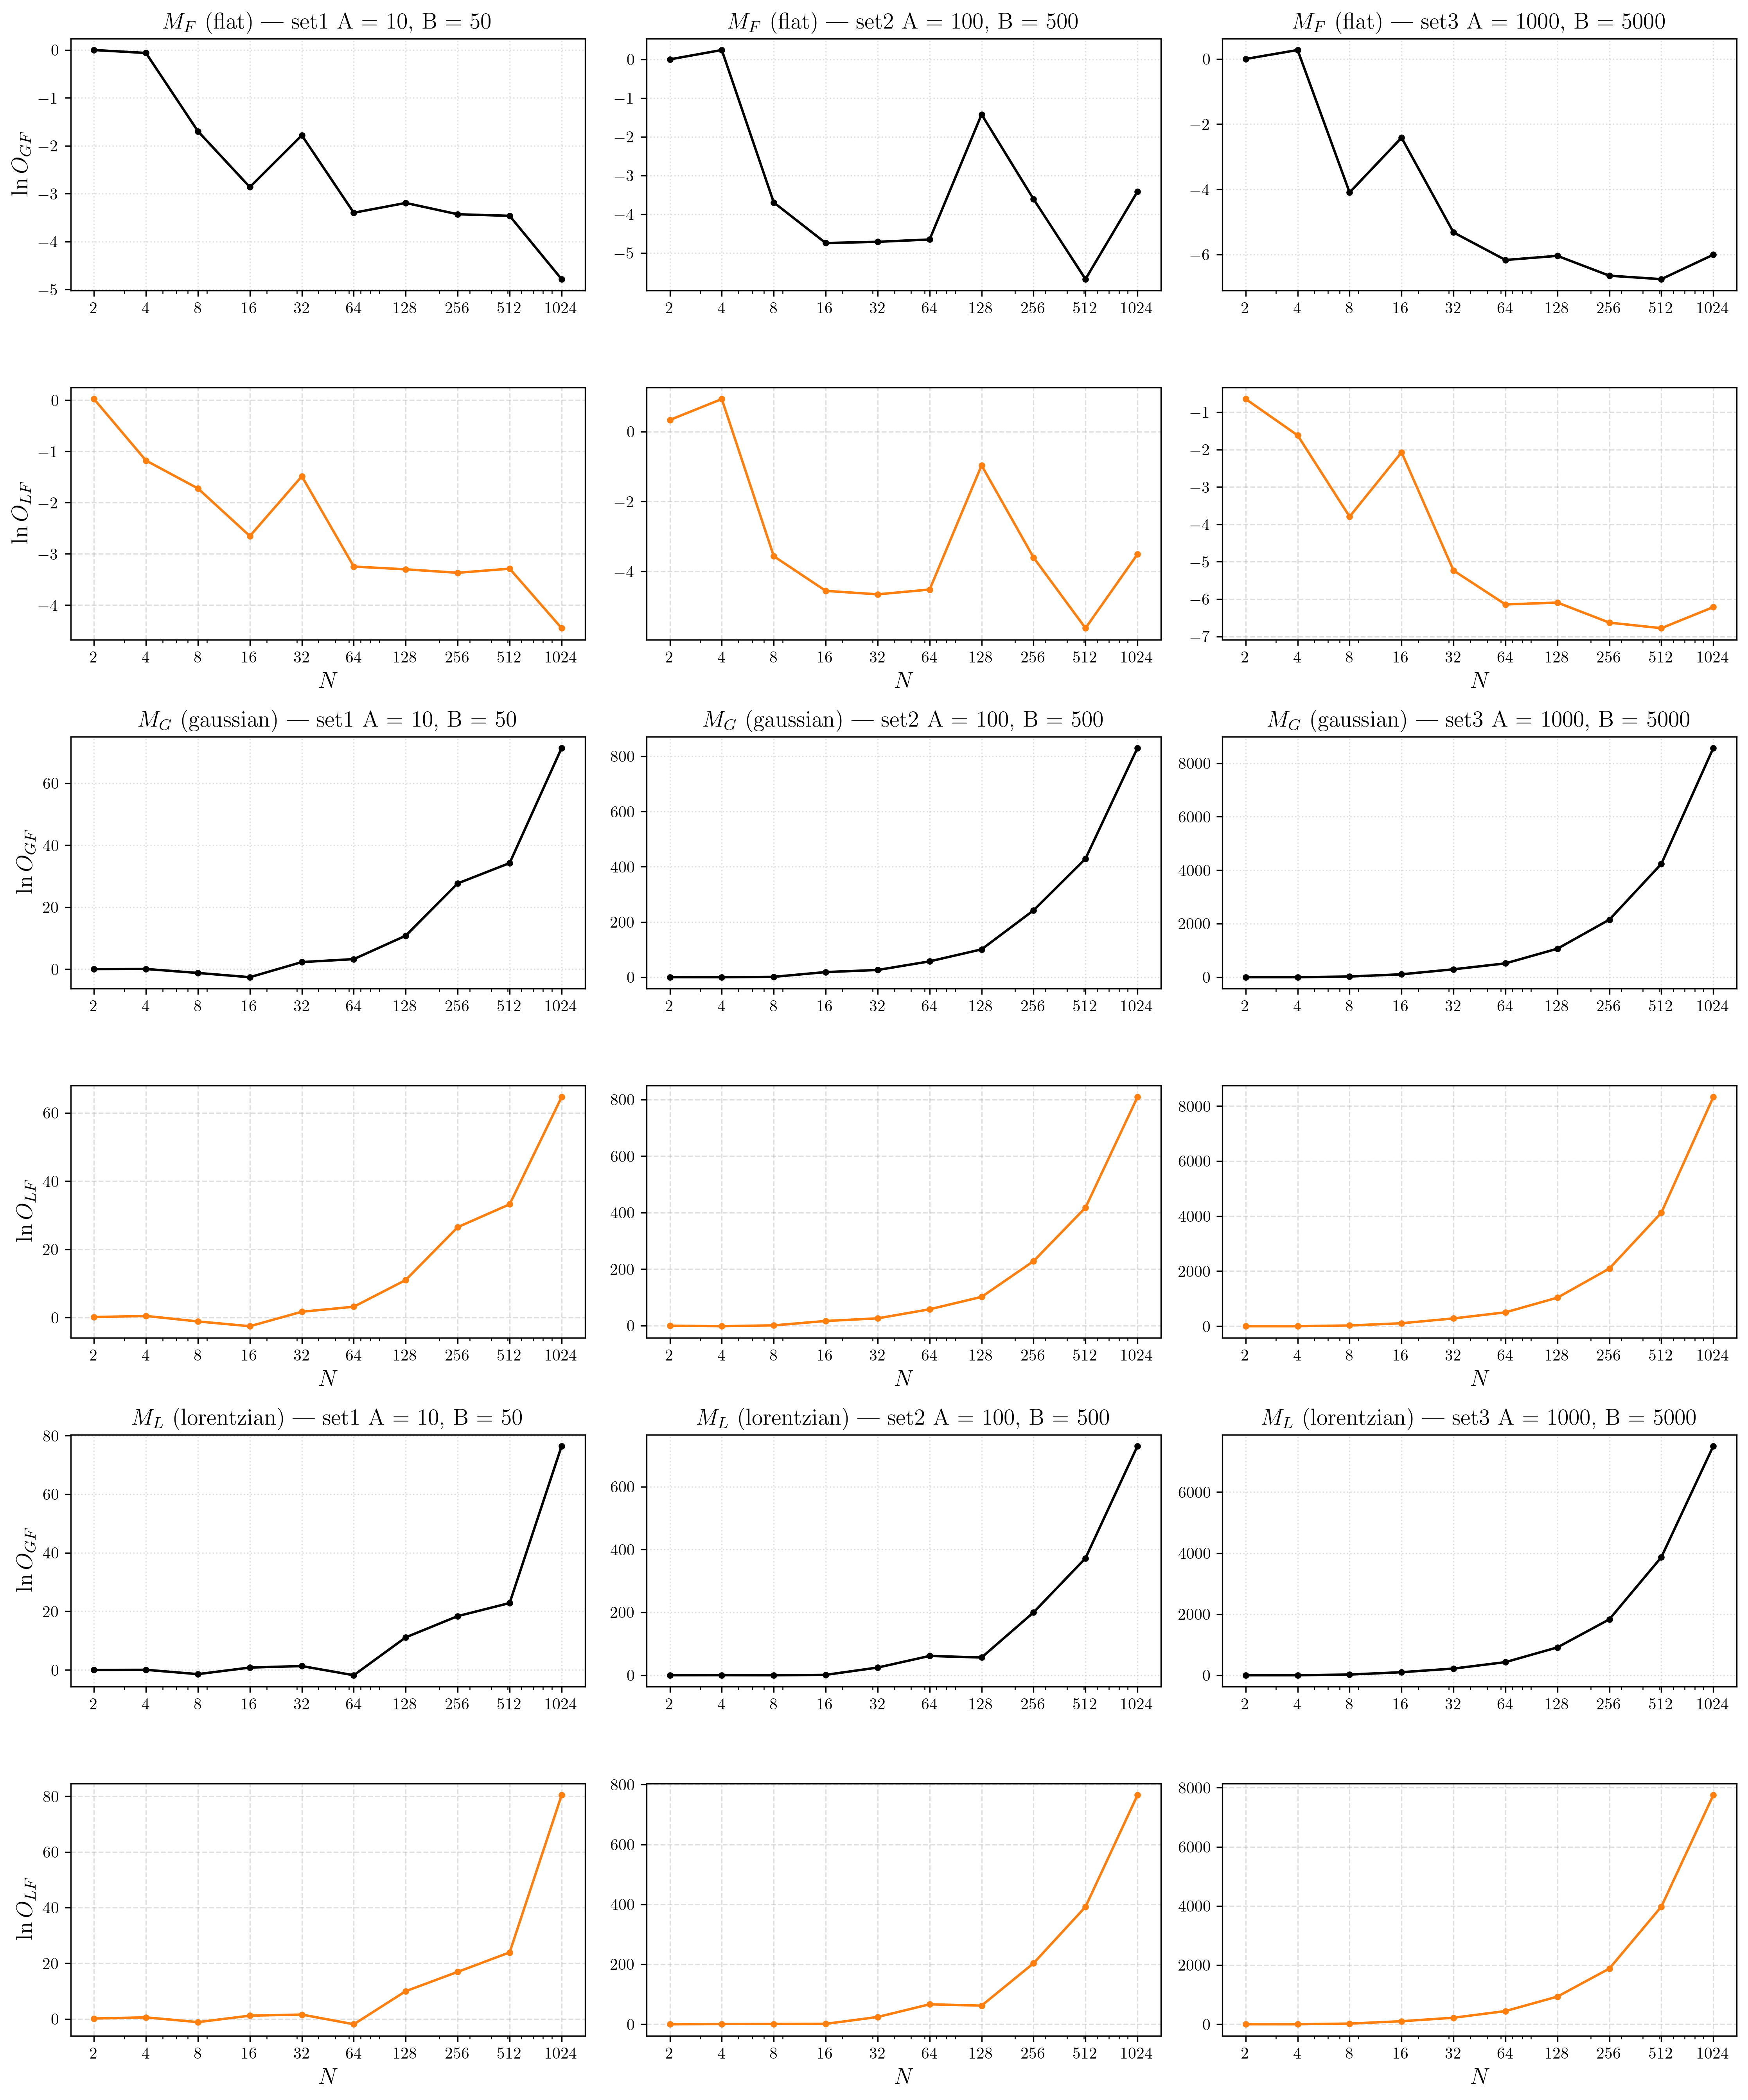

In [58]:
# 将三组 (每组对应一个 data_model) 垂直排列，每组 2 行 x 3 列 -> 总体 6 行 x 3 列
fig, axes = plt.subplots(6, 3, figsize=(15, 18))
for g, (dist_label, model_name) in enumerate(data_models):
    for col_idx, (A_true, B) in enumerate(param_sets):
        lnO_GF_arr, lnO_LF_arr = results_map[(col_idx, dist_label)]

        ax_top = axes[2 * g, col_idx]     # lnO_GF
        ax_bot = axes[2 * g + 1, col_idx] # lnO_LF

        ax_top.plot(num_bins_list, lnO_GF_arr, '.-k', ms=6)
        ax_top.set_xscale('log')
        ax_top.set_xticks(num_bins_list)
        ax_top.get_xaxis().set_major_formatter(plt.ScalarFormatter())
        ax_top.set_title(
            f'{model_name} --- set{col_idx+1} A = {A_true}, B = {B}', fontsize=14
        )
        if col_idx == 0:
            ax_top.set_ylabel(r'$\ln O_{GF}$', fontsize=14)
        ax_top.grid(True, linestyle=':', alpha=0.4)

        ax_bot.plot(num_bins_list, lnO_LF_arr, '.-C1', ms=6)
        ax_bot.set_xscale('log')
        ax_bot.set_xticks(num_bins_list)
        ax_bot.get_xaxis().set_major_formatter(plt.ScalarFormatter())
        if col_idx == 0:
            ax_bot.set_ylabel(r'$\ln O_{LF}$', fontsize=14)
        ax_bot.set_xlabel(r'$N$', fontsize=14)
        ax_bot.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

对于三种不同的 $A$ 真值和 $B$ 值 (已知)，分别采用三个不同的模拟方式 (flat, Gaussian, Lorentzian) 生成数据集，每个数据集生成了不同的 $N$ 个数据，并把 $\ln O_{GF}$ (Gaussian 分布 over flat 分布的后验比)、$\ln O_{LF}$ (Lorentzian 分布 over flat 分布的后验比) 视为 $N$ 的函数绘图，得到上面 18 个图片.

可以发现，对于 flat 分布生成的数据集，Gaussian 分布和 Lorentzian 分布并没有体现出很大的优势 (甚至没有优势)，但是后面两种数据集中，Gaussian 分布和 Lorentzian 分布明显表现出极佳的适配性，而且和预期一样，$N$ 越大后验比越大.

另一个有趣的现象是，$A$ 和 $B$ 的真值变大时，后验比都会变大，我想这可能是因为 $A$ 变大显著增强了分布的不均匀性，也就减弱了 flat 分布的适配度.

#### Question 3.3: Line profile identification

**Tasks:**
1. For cases where a spectral line is present ($\ln O_{GF} > 5$), compare models $M_G$ and $M_L$ to identify the line profile.
2. Compute the posterior log-odds $\ln O_{GL} \equiv \ln [p(M_G|D,I) / p(M_L|D,I)]$ with a model prior of $p(M_G) = p(M_L) = 0.5$.
3. What is your conclusion regarding the line profile for each case?

In [76]:
threshold = 5.0
summary = []

for i, (A_true, B) in enumerate(param_sets):
    for dist_label, model_name in data_models:
        lnO_GF_arr, lnO_LF_arr = results_map[(i, dist_label)]
        inds = np.where(lnO_GF_arr > threshold)[0]
        if inds.size == 0:
            print(f"set{i+1} {model_name}: 无 ln O_GF > {threshold} 的情况")
            continue
        print(f"set{i+1} {model_name}: 找到 {inds.size} 个 lnO_GF > {threshold} 的情况，逐一比较 M_G vs M_L：")
        for k in inds:
            nb = num_bins_list[k]
            lam_i, counts, mu_expect = sim_data(
                nb, dist=dist_label, A=A_true, B=B, mu=0, sigma=1, gamma=1,
                seed=seed + i * 100 + (0 if dist_label == 'f' else (1 if dist_label == 'g' else 2))
            )
            profile_g = np.exp(-0.5 * ((lam_i - 0) / 1.0) ** 2)
            profile_l = (1.0 ** 2) / ((lam_i - 0) ** 2 + 1.0 ** 2)
            A_max = 2.0 * B
            logE_G = log_evidence_line(counts, profile_g, B, A_min=0.0, A_max=A_max, nA=1000)
            logE_L = log_evidence_line(counts, profile_l, B, A_min=0.0, A_max=A_max, nA=1000)
            lnO_GL = logE_G - logE_L
            pref = "Gaussian" if lnO_GL > 0 else "Lorentzian"
            cat = ("decisive" if abs(lnO_GL) >= 5 else
                   "strong" if abs(lnO_GL) >= 3 else
                   "substantial" if abs(lnO_GL) >= 1 else
                   "barely")
            print(f"  N = {nb:4d}: lnO_GF = {lnO_GF_arr[k]:6.2f}, lnO_GL = {lnO_GL:6.2f} -> {pref} ({cat})")
            summary.append(((i, dist_label, nb), lnO_GF_arr[k], lnO_GL))

set1 $M_F$ (flat): 无 ln O_GF > 5.0 的情况
set1 $M_G$ (gaussian): 找到 4 个 lnO_GF > 5.0 的情况，逐一比较 M_G vs M_L：
  N =  128: lnO_GF =  10.78, lnO_GL =  -0.26 -> Lorentzian (barely)
  N =  256: lnO_GF =  27.66, lnO_GL =   1.14 -> Gaussian (substantial)
  N =  512: lnO_GF =  34.23, lnO_GL =   0.99 -> Gaussian (barely)
  N = 1024: lnO_GF =  71.35, lnO_GL =   6.70 -> Gaussian (decisive)
set1 $M_L$ (lorentzian): 找到 4 个 lnO_GF > 5.0 的情况，逐一比较 M_G vs M_L：
  N =  128: lnO_GF =  11.12, lnO_GL =   1.13 -> Gaussian (substantial)
  N =  256: lnO_GF =  18.37, lnO_GL =   1.46 -> Gaussian (substantial)
  N =  512: lnO_GF =  22.85, lnO_GL =  -1.06 -> Lorentzian (substantial)
  N = 1024: lnO_GF =  76.44, lnO_GL =  -3.94 -> Lorentzian (strong)
set2 $M_F$ (flat): 无 ln O_GF > 5.0 的情况
set2 $M_G$ (gaussian): 找到 7 个 lnO_GF > 5.0 的情况，逐一比较 M_G vs M_L：
  N =   16: lnO_GF =  18.46, lnO_GL =   1.75 -> Gaussian (substantial)
  N =   32: lnO_GF =  26.02, lnO_GL =  -0.02 -> Lorentzian (barely)
  N =   64: lnO_GF =  57.24, lnO_

在峰值足够高的时候 ($A$ 真值足够大)，最终的决定性结果和生成数据集时采用的模型几乎是一一对应的.

### Note: steps for submitting the exercise

1. In the menu bar, select `File > Download` to download your notebook as a `.ipynb` file.
2. Select `File > Save and Export Notebook As > PDF` to export your notebook as a PDF file.
3. Combine the `.ipynb` and `.pdf` files into a single `.zip` or `.tar.gz` archive.
4. Upload your archive to the web learning platform (网络学堂).